In [1]:
from tqdm import tqdm_notebook as tqdm
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
!apt install libspatialindex-dev
!pip install rtree
!pip install geopandas
import geopandas as gpd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab import drive
drive.mount('/content/drive')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 31 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-c6 amd64 1.9.3-2 [55.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-dev amd64 1.9.3-2 [16.0 kB]
Fetched 319 kB in 1s (522 kB/s)
Selecting previously unselected package libspatialindex6:amd64.
(Reading database ... 121730 files and directories currently installed.)
Preparing to unpack .../libspatialindex6_1.9.3-2_amd64.deb ...
Unp

In [ ]:
# @title
columns = pd.read_excel('/content/drive/MyDrive/SD/Socialeconomic data/Excel/2007-2020JProad.xlsx').columns[4:]
columns

In [ ]:
# @title
road = gpd.read_file('/content/drive/MyDrive/SD/Socialeconomic data/shp/Road/2007-2020JProad.shp')
road

In [ ]:
# @title
old = road.columns[10:-1]
old

In [ ]:
# @title
dic =  dict(zip(old, columns))
road.rename(columns = dic, inplace=True)
road

In [ ]:
# @title
road.to_file('/content/drive/MyDrive/SD/Socialeconomic data/shp/Road/2007-2020JProad.shp')

In [22]:
sheet_names = pd.ExcelFile('/content/drive/MyDrive/SD/Emission & Heat data/Excel/Emission.xlsx').sheet_names[:16] ## 表名列表
for sheet_name in sheet_names:

  df = pd.read_excel('/content/drive/MyDrive/SD/Emission & Heat data/Excel/Emission.xlsx', usecols = [0,2,3,4,5,6,7], sheet_name = sheet_name)
  sector = ["Agriculture, Forestry and Fishery",
        "Mining, Quarrying of Stone and Gravel",
        'Construction Work Industry',
        "Manufacture of Food, Beverages, Tobacco and Feed",
        'Manufacture of Textile Mill Products',
        "Manufacture of Lumber, Wood Products, Furniture and Fixtures",
        "Manufacture of Pulp, Paper and Paper Products",
        'Printing and Allied Industries',
        "Manufacture of Chemical and Allied Products, Oil and Coal Products",
        "Manufacture of Plastic Products, Rubber Products and Leather Products",
        "Manufacture of Ceramic, Stone and Clay Products",
        'Manufacture of Iron and Steel',
        'Manufacture of Machinery',
        'Miscellaneous Manufacturing Industry',
        "Electricity, Gas, Heat Supply and Water",
        'Information and Communications',
        'Transport and Postal Activities',
        'Wholesale and Retail Trade',
        'Finance and Insurance',
        'Real Estate and Goods Rental and Leasing',
        "Scientific Research, Professional and Technical Services",
        "Accommodations, Eating and Drinking Services",
        'Living Related and Personal Services and Amusement Services',
        "Education, Learning Support",
        "Medical, Health Care and Welfare",
        'Compound Services',
        'Miscellaneous Services',
        'Government',
        'Unable to Classify',
        'Residential',
        'Transportation',
        'Non-Energy']

  df = df.loc[df['Sector'].isin(sector)]
  if sheet_name == '90FY':
    df['Year'] = 1990
    emission = df

  else:
    df['Year'] = int('20' + sheet_name[:2])
    emission = emission.append(df)

emission

,Prefecture,Sector,産業,Coal,Oil,Gas,Electricity,Year
0,hokkaidou,"Agriculture, Forestry and Fishery",農林水産業,0.000000,3699.317525,0.784608,0.0,1990
1,hokkaidou,"Mining, Quarrying of Stone and Gravel",鉱業他,75.414915,421.640953,18.819409,0.0,1990
2,hokkaidou,Construction Work Industry,建設業,0.000000,1571.888091,5.987446,0.0,1990
3,hokkaidou,"Manufacture of Food, Beverages, Tobacco and Feed",食品飲料製造業,18.728233,443.977470,56.755267,0.0,1990
4,hokkaidou,Manufacture of Textile Mill Products,繊維工業,16.637972,43.882298,1.913963,0.0,1990
...,...,...,...,...,...,...,...,...
1531,okinawa,Government,公 務,0.031281,12.161296,4.516585,0.0,2020
1532,okinawa,Unable to Classify,業種不明・分類不能,0.000000,0.000000,0.000000,0.0,2020
1533,okinawa,Residential,家 庭,0.000000,245.389247,19.153923,0.0,2020
1534,okinawa,Transportation,運 輸,0.000000,761.109384,0.000000,0.0,2020


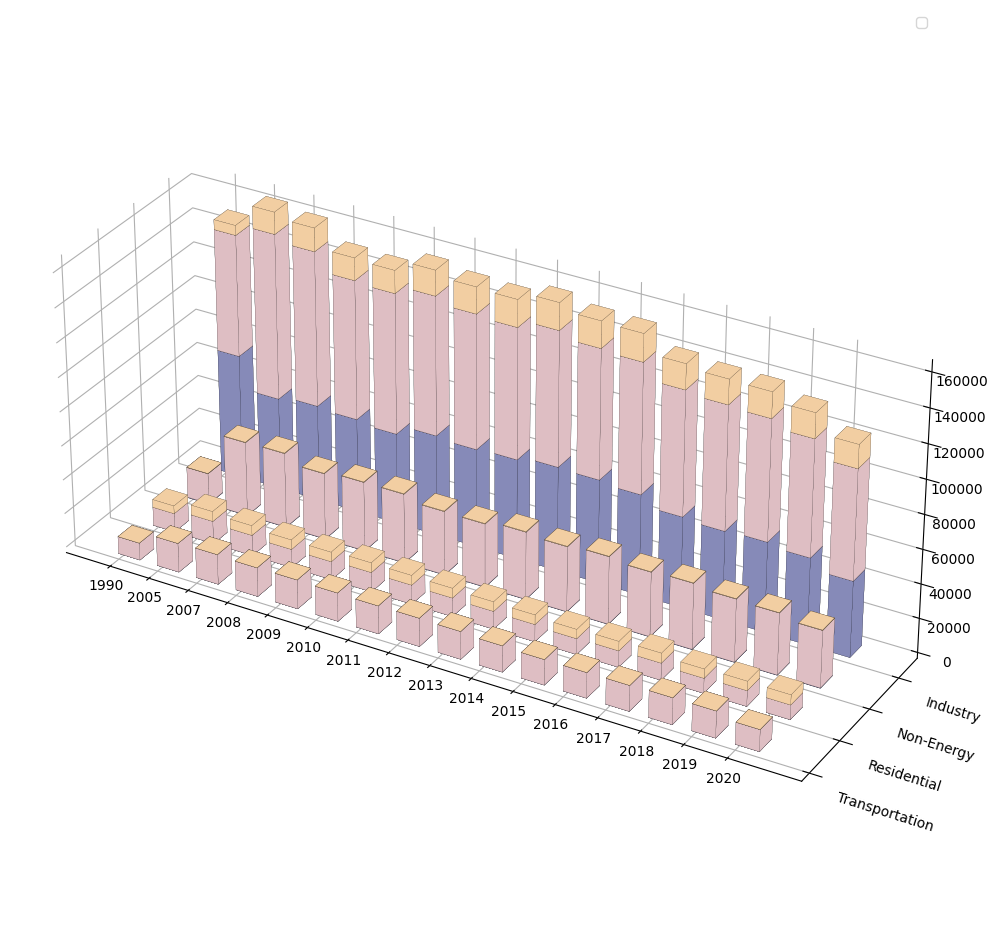

In [ ]:
from matplotlib.colors import LightSource
import matplotlib as mpl

df_pivot1 = emission1.pivot_table(index='Year', columns='Industry', values=['Coal', 'Oil', 'Gas'], aggfunc='sum', fill_value=0)

# 绘制三维堆积柱状图
fig1 = plt.figure(figsize=(24, 12))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.view_init(elev=30, azim=-60)

# 设置网格线颜色和样式
ax1.w_xaxis.pane.set_color('w');
ax1.w_yaxis.pane.set_color('w');
ax1.w_zaxis.pane.set_color('w');
# ax.grid(color='gray', linestyle='solid', linewidth=0.5, axis = 'z')
plt.rcParams['grid.color'] = "grey"
mpl.rcParams['lines.linewidth'] = 0.05
ax1.grid(False, axis = 'x')
ax1.grid(False, axis = 'y')

xs = np.arange(len(df_pivot1.index))

for j, industry in enumerate(['Industry', 'Non-Energy', 'Residential', 'Transportation'][::-1]):
    for i, year in enumerate(df_pivot1.index):
        zs_coal = df_pivot1.loc[year, ('Coal', industry)]
        zs_oil = df_pivot1.loc[year, ('Oil', industry)]
        zs_gas = df_pivot1.loc[year, ('Gas', industry)]

        ax1.bar3d(i, j, 0, 0.55, 0.4, zs_coal, color='#868AB8', alpha=1, shade=False, edgecolor='k', linewidth = 0.1)
        ax1.bar3d(i, j, zs_coal, 0.55, 0.4, zs_oil, color='#DEBEC3', alpha=1, shade=False, edgecolor='k', linewidth = 0.1)
        ax1.bar3d(i, j, zs_coal + zs_oil, 0.55, 0.4, zs_gas, color='#F2CEA2', alpha=1, shade=False, edgecolor='k', linewidth = 0.1)


# 设置 x 轴刻度标签
ax1.set_xticks(np.arange(len(df_pivot1.index)))
ax1.set_xticklabels(df_pivot1.index, rotation=0)

# 设置 y 轴刻度标签
ax1.set_yticks(np.arange(len(['Industry', 'Non-Energy', 'Residential', 'Transportation'])))
ax1.set_yticklabels(['Industry', 'Non-Energy', 'Residential', 'Transportation'][::-1], horizontalalignment = 'left', rotation=-17.5)

# 设置其他标签
# ax.set_xlabel('Year')
# ax.set_ylabel('Industry')
# ax.set_zlabel('Carbon Emission')
# ax.set_title('Carbon Emission by Industry Over Years')

# 设置 equal 参数，使得 x、y 和 z 轴的比例相同
ax1.set_box_aspect([1, 0.3, 0.4])

plt.legend()
plt.tight_layout()
plt.show()

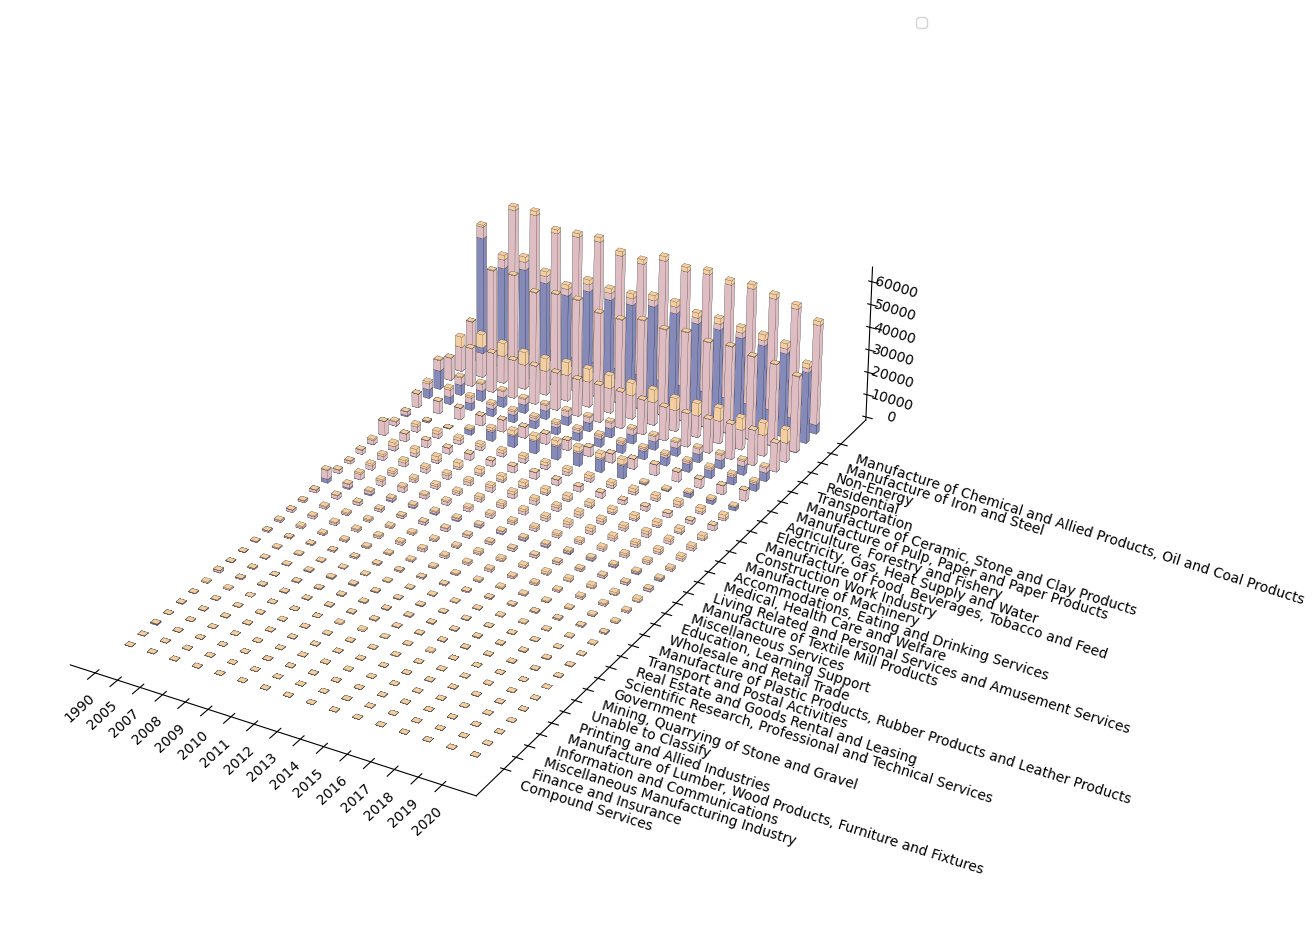

In [ ]:
emission3 = emission1.loc[emission1['Industry'] != 'Industry'].append(emission2)
df_pivot2 = emission2.pivot_table(index='Year', columns='Industry', values=['Coal', 'Oil', 'Gas'], aggfunc='sum', fill_value=0)
df_pivot3 = emission3.pivot_table(index='Year', columns='Industry', values=['Coal', 'Oil', 'Gas'], aggfunc='sum', fill_value=0)
test = emission3.groupby('Industry').agg({'Coal':'sum','Oil':'sum','Gas':'sum'})
test['sum'] = test['Coal'] + test['Oil'] + test['Gas']
sector_sorted = list(test.sort_values('sum').index[::-1]) #+ ['Residential','Transportation','Non-Energy']

# 绘制三维堆积柱状图
fig2 = plt.figure(figsize=(30, 12))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.view_init(elev=30, azim=-60)

# 设置画布的透明度
fig2.patch.set_alpha(0.0)

# 设置坐标轴背景的透明度
ax2.patch.set_alpha(0.0)

# 设置网格线颜色和样式
ax2.w_xaxis.pane.set_color('w');
ax2.w_yaxis.pane.set_color('w');
ax2.w_zaxis.pane.set_color('w');

# 设置坐标轴的透明度
ax2.w_xaxis.pane.fill = False
ax2.w_yaxis.pane.fill = False
ax2.w_zaxis.pane.fill = False

# 设置坐标轴平面的透明度
ax2.w_xaxis.pane.set_edgecolor('w')
ax2.w_yaxis.pane.set_edgecolor('w')
ax2.w_zaxis.pane.set_edgecolor('w')

# ax.grid(color='gray', linestyle='solid', linewidth=0.5, axis = 'z')
plt.rcParams['grid.color'] = "grey"
mpl.rcParams['lines.linewidth'] = 0.05
ax2.grid(False)

xs = np.arange(len(df_pivot3.index))

for j, industry in enumerate(sector_sorted[::-1]):
    for i, year in enumerate(df_pivot3.index):
        zs_coal = df_pivot3.loc[year, ('Coal', industry)]
        zs_oil = df_pivot3.loc[year, ('Oil', industry)]
        zs_gas = df_pivot3.loc[year, ('Gas', industry)]

        ax2.bar3d(i, j, 0, 0.3, 0.3, zs_coal, color='#868AB8', alpha=1, shade=False, edgecolor='k', linewidth = 0.1)
        ax2.bar3d(i, j, zs_coal, 0.3, 0.3, zs_oil, color='#DEBEC3', alpha=1, shade=False, edgecolor='k', linewidth = 0.1)
        ax2.bar3d(i, j, zs_coal + zs_oil, 0.3, 0.3, zs_gas, color='#F2CEA2', alpha=1, shade=False, edgecolor='k', linewidth = 0.1)


# 设置 x 轴刻度标签
ax2.set_xticks(np.arange(len(df_pivot3.index)))
ax2.set_xticklabels(df_pivot3.index, rotation=42.5)

# 设置 y 轴刻度标签
ax2.set_yticks(np.arange(len(sector_sorted)))
ax2.set_yticklabels(sector_sorted[::-1], horizontalalignment = 'left', rotation=-17.5)

# 设置 z 轴刻度标签
ax2.set_zticklabels([0,10000,20000,30000,40000,50000,60000],rotation=-17.5)

# 设置其他标签
# ax.set_xlabel('Year')
# ax.set_ylabel('Industry')
# ax.set_zlabel('Carbon Emission')
# ax.set_title('Carbon Emission by Industry Over Years')

# 设置 equal 参数，使得 x、y 和 z 轴的比例相同
ax2.set_box_aspect([1, 1.8, 0.4])

plt.legend()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/SD/Figure/bar3d.png', dpi=300, bbox_inches='tight')
plt.show()

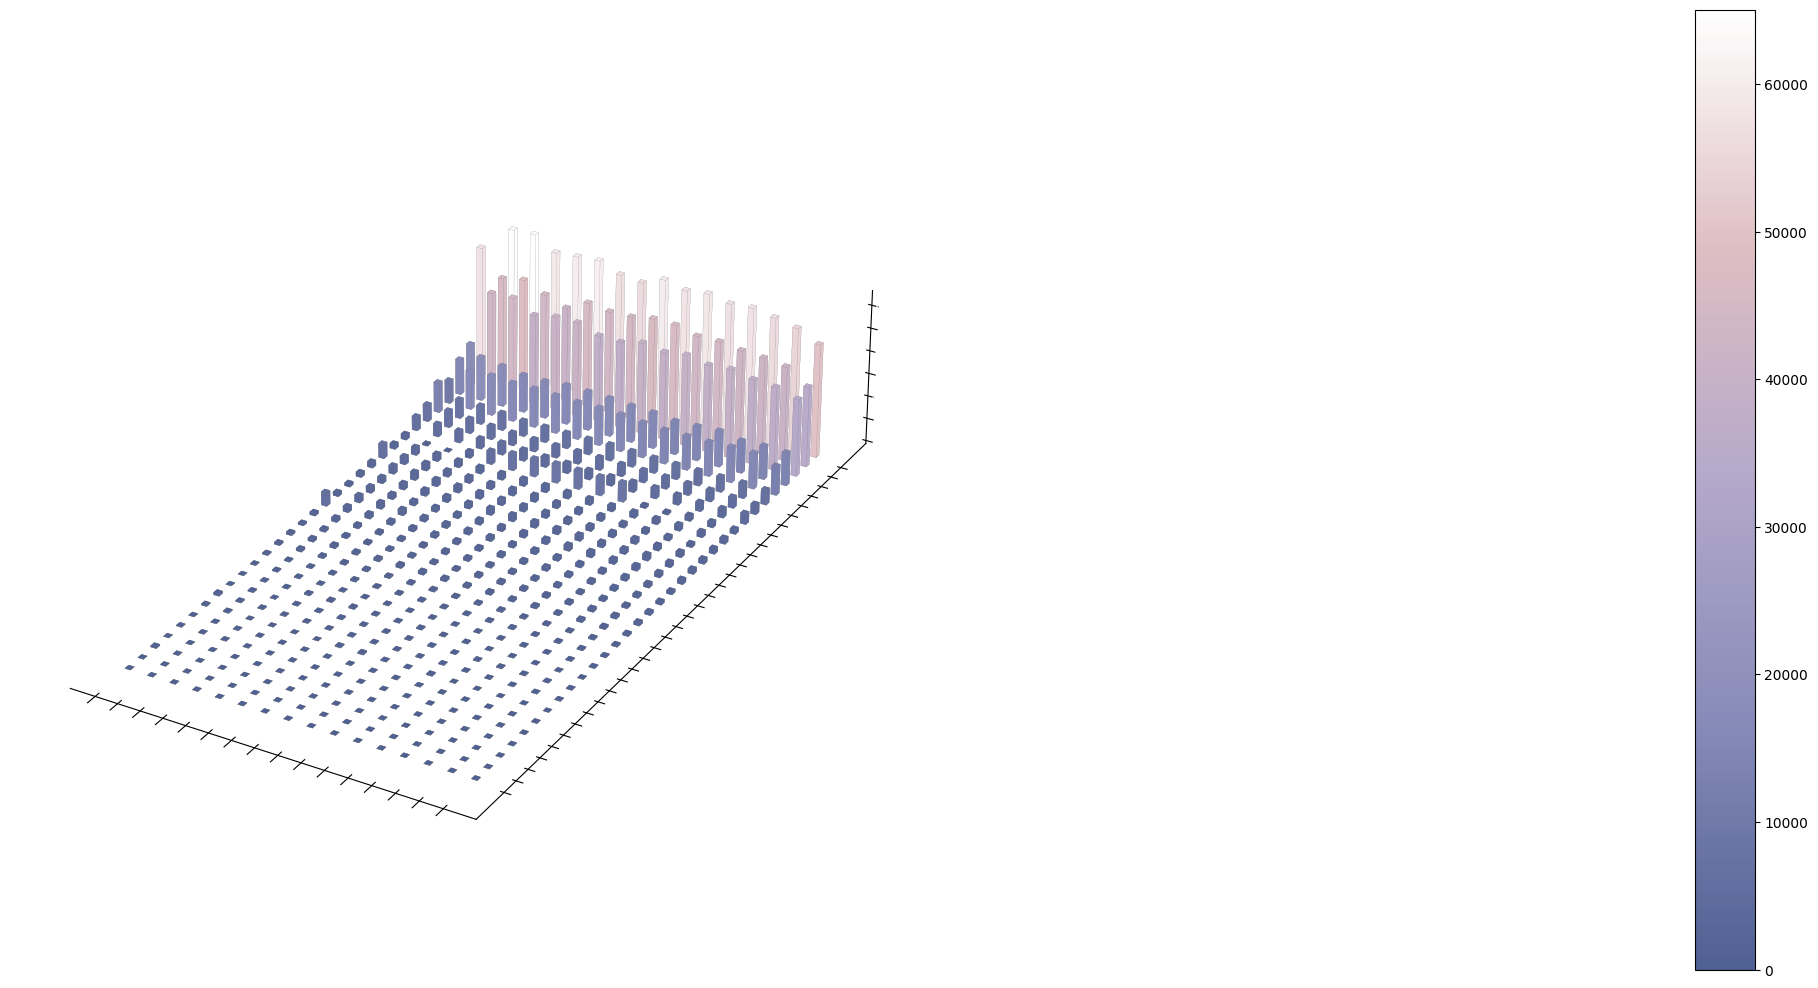

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.colorbar import ColorbarBase

# ...（你的数据处理部分）

# 计算每一年每个Industry和燃料类型的碳排放总和
df_pivot3 = emission3.groupby(['Year', 'Industry'])[['Coal', 'Oil', 'Gas']].sum().reset_index()
df_pivot3['sum'] = df_pivot3[['Coal', 'Oil', 'Gas']].sum(axis=1)

# 创建渐变颜色映射
cmap = LinearSegmentedColormap.from_list('mycmap', ['#FFFFFF', '#DEBEC3', '#B2A7CA', '#868AB8', '#4F6092'][::-1])

# 归一化范围
norm = Normalize(vmin=df_pivot3['sum'].min(), vmax=df_pivot3['sum'].max())

# 获取 y 轴的标签列表
test = emission3.groupby('Industry').agg({'Coal':'sum', 'Oil':'sum', 'Gas':'sum'})
test['sum'] = test['Coal'] + test['Oil'] + test['Gas']
sector_sorted = list(test.sort_values('sum').index)

# 绘制三维柱状图
fig2 = plt.figure(figsize=(30, 12))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.view_init(elev=30, azim=-60)

# 设置画布的透明度
fig2.patch.set_alpha(0.0)

# 设置坐标轴背景的透明度
ax2.patch.set_alpha(0.0)

# 设置网格线颜色和样式
ax2.w_xaxis.pane.set_color('w')
ax2.w_yaxis.pane.set_color('w')
ax2.w_zaxis.pane.set_color('w')

# 设置坐标轴的透明度
ax2.w_xaxis.pane.fill = False
ax2.w_yaxis.pane.fill = False
ax2.w_zaxis.pane.fill = False

# 设置坐标轴平面的透明度
ax2.w_xaxis.pane.set_edgecolor('w')
ax2.w_yaxis.pane.set_edgecolor('w')
ax2.w_zaxis.pane.set_edgecolor('w')

# ax.grid(color='gray', linestyle='solid, linewidth=0.5, axis='z')
plt.rcParams['grid.color'] = "grey"
mpl.rcParams['lines.linewidth'] = 0.05
ax2.grid(False)

xs = np.arange(len(df_pivot3['Year'].unique()))

for i, industry in enumerate(sector_sorted):
    zs = df_pivot3[df_pivot3['Industry'] == industry]['sum'].values
    color = cmap(norm(zs))

    ax2.bar3d(xs, i, 0, 0.25, 0.3, zs, color=color, shade=False, edgecolor='grey', linewidth=0.1)

# 设置 x 轴刻度标签
ax2.set_xticks(xs)
ax2.set_xticklabels(df_pivot3['Year'].unique(), color = 'w', rotation=42.5)

# 设置 y 轴刻度标签
ax2.set_yticks(np.arange(len(sector_sorted)))
ax2.set_yticklabels(sector_sorted, color = 'w',horizontalalignment='left', rotation=-17.5)

# 设置 z 轴刻度标签
ax2.set_zticklabels([0, 10000, 20000, 30000, 40000, 50000, 60000], color = 'w', rotation=-17.5)

# 设置其他标签
# ax2.set_xlabel('Year')
# ax2.set_ylabel('Industry')
# ax2.set_zlabel('Total Carbon Emission')
# ax2.set_title('Total Carbon Emission by Industry Over Years')

# 设置 equal 参数，使得 x、y 和 z 轴的比例相同
ax2.set_box_aspect([1, 1.8, 0.4])

# 添加颜色条
cax = fig2.add_axes([0.92, 0.1, 0.02, 0.8])
cb = ColorbarBase(cax, cmap=cmap, norm=norm, orientation='vertical')
# cb.set_label('Total Carbon Emission')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/SD/Figure/bar3d.png', dpi=300, bbox_inches='tight')
plt.show()


In [25]:
# @title
df_pivot = emission.groupby(['Year', 'Sector'])[['Coal', 'Oil', 'Gas', 'Electricity']].sum().reset_index()
df_pivot['sum'] = df_pivot[['Coal', 'Oil', 'Gas', 'Electricity']].sum(axis=1)
df_pivot.groupby('Year').agg({'Coal':'sum', 'Oil':'sum', 'Gas':'sum', 'Electricity':'sum', 'sum':'sum'})

,Coal,Oil,Gas,Electricity,sum
Year,,,,,
1990,267691.720343,403762.927088,38337.411322,217149.756166,9.269418e+05
2005,198556.647116,632004.895955,69768.251482,256036.821960,1.156367e+06
2007,207906.397761,607173.346803,72692.745987,297190.987608,1.184963e+06
2008,203821.845993,547746.637841,69977.046784,279820.388772,1.101366e+06
2009,196864.265880,556878.985687,70859.254616,240291.804717,1.064894e+06
2010,218363.255701,555205.578756,77041.769493,262929.104843,1.113540e+06
2011,213785.662783,532364.218648,79427.974056,320318.653449,1.145897e+06
2012,217062.965392,522814.507283,81307.573555,348289.922795,1.169475e+06
2013,226224.560416,536404.134667,80233.106577,363326.941530,1.206189e+06


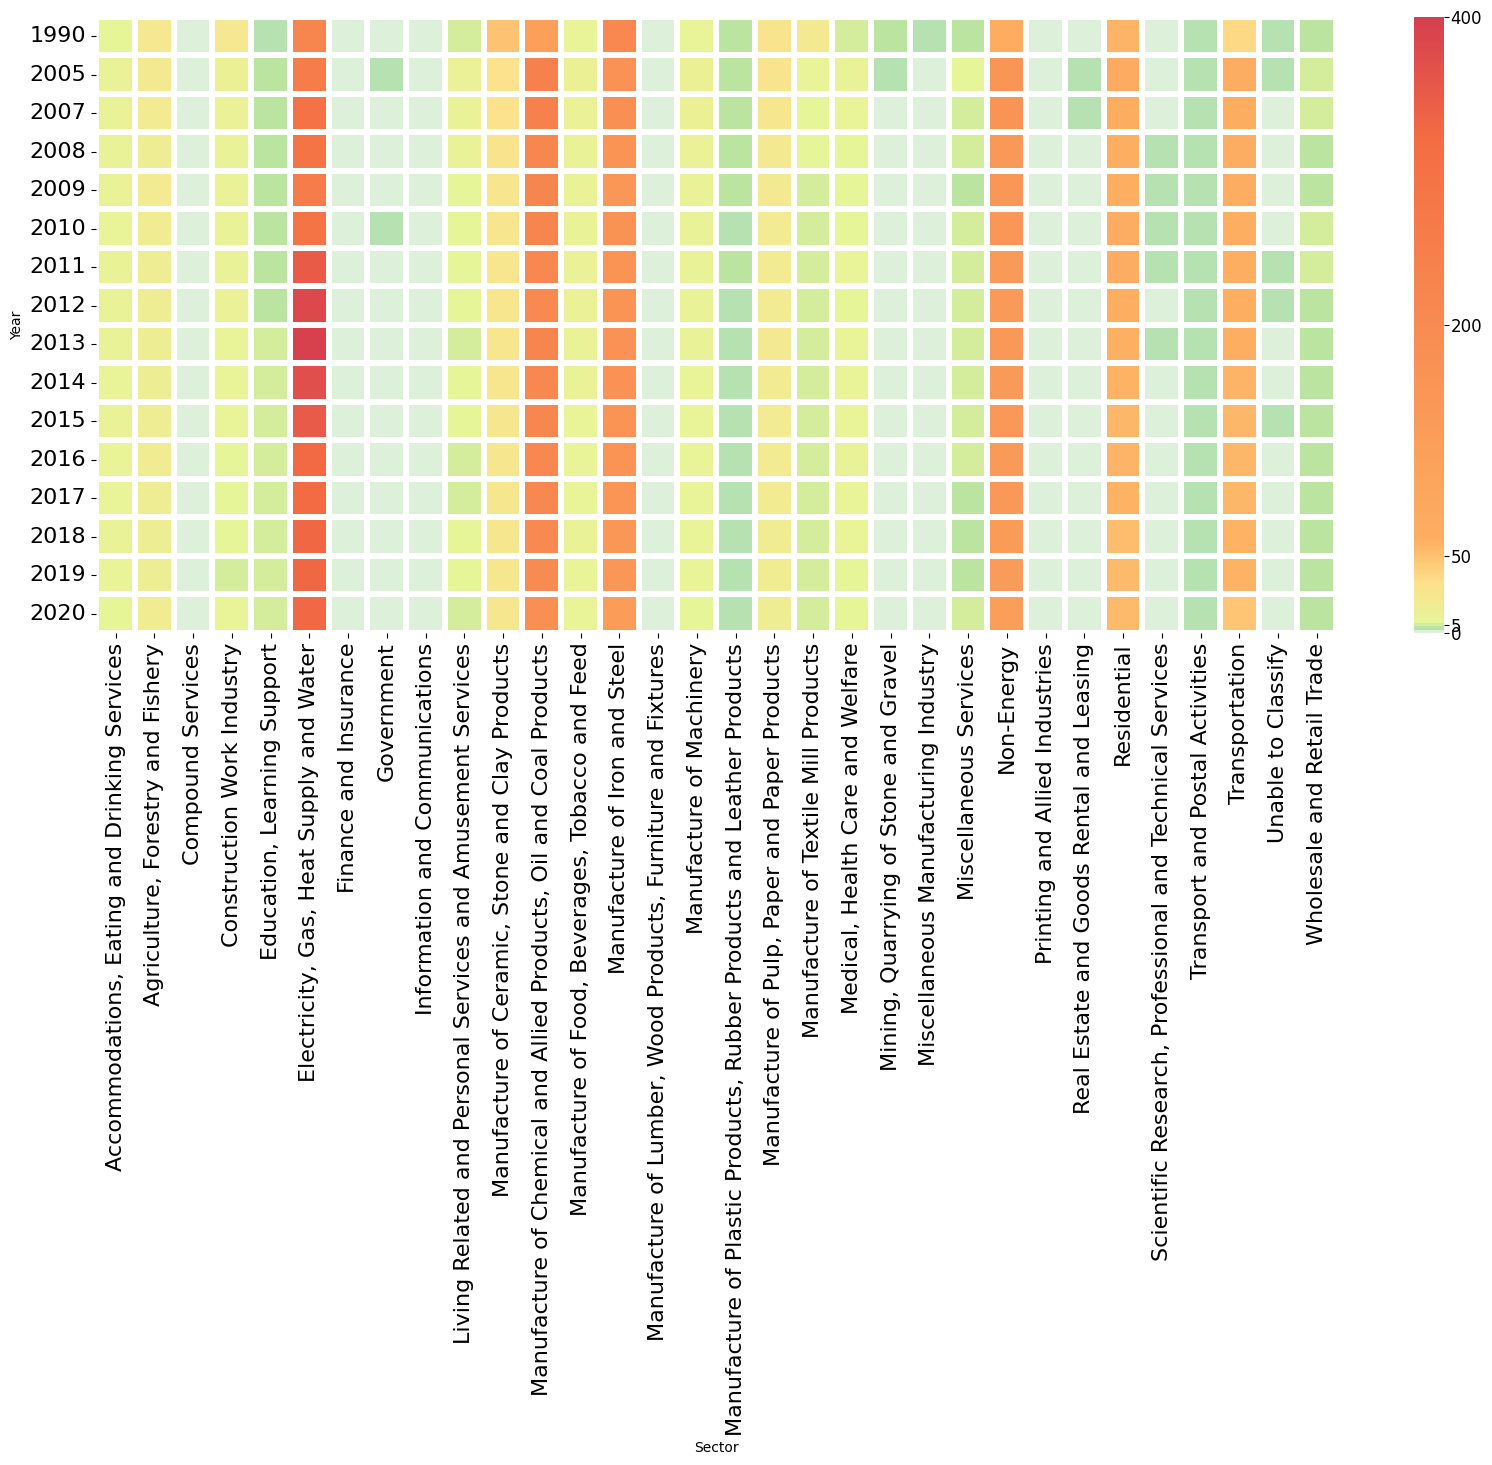

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap


# clist = ['#FFFFFF', '#DEBEC3', '#B2A7CA', '#868AB8', '#4F6092'][::-1]
# vlist = [0, 0.02, 0.1, 0.5, 1]
clist = ['#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#ddf1da'][::-1] #绿黄红渐变
# clist = ['#4F6092', '#868AB8', '#B2A7CA', '#DEBEC3', '#F2CEA2', '#E4A887', '#B07C6D'][::1] #蓝粉渐变
vlist = [0, 0.005, 0.015, 0.08, 0.15, 0.8, 1]
newcmp = LinearSegmentedColormap.from_list('自定义不均匀的颜色条', list(zip(vlist,clist)))

# # 计算每个行业所有年份的碳排放总和
# industry_totals = df_pivot3.groupby('Industry')['sum'].sum()

# # 按总排放量从大到小排序
# sorted_industries = industry_totals.sort_values(ascending=False)

# # 提取前三个行业和第三名以后的行业
# top_3_industries = sorted_industries.head(3).index.tolist()
# remaining_industries = sorted_industries[3:].index.tolist()

heatmap_data = df_pivot.pivot(index='Year', columns='Sector', values='sum')
heatmap_data = heatmap_data.apply(lambda x: x/1000)

# # 绘制前三个行业的热力图
# plt.figure(figsize=(12, 8))
# sns.heatmap(df_top_3, cmap='viridis', square=True, cbar_kws={"label": "Carbon Emission"}, linewidths=.5)
# plt.title('前三个行业的热力图')
# plt.show()

# # 绘制第三名以后的行业的热力图
# plt.figure(figsize=(12, 8))
# sns.heatmap(df_remaining, cmap='viridis', square=True, cbar_kws={"label": "Carbon Emission"}, linewidths=.5)
# plt.title('第三名以后的行业的热力图')
# plt.show()

f, ax = plt.subplots(figsize = (20,8))
f.set_facecolor('white')
ax.patch.set_facecolor('white')

labels = heatmap_data.index.tolist()
clist = [0,5,50,200,400]

h = sns.heatmap(heatmap_data, cmap = newcmp, annot = False,
                linecolor = 'white', linewidths = '4',
                norm = mpl.colors.Normalize(vmin = 0, vmax = 400),
                cbar_kws = {'ticks':clist})

# 调整颜色条刻度文字大小
cbar = h.collections[0].colorbar
cbar.ax.tick_params(labelsize=12, pad=1)

ax.xaxis.set_ticks_position('bottom')
plt.xticks(fontsize = 16, color = 'k', rotation = 90)
plt.yticks(fontsize = 16, color = 'k', rotation = 0)

# plt.text(1.06,1.02,'Carbon emission(1000tCO2)',transform=ax.transAxes,color='k', fontsize = 16)
# plt.title('Carbon emission of sectors 1990 to 2020',pad = 20,fontsize = 20, fontweight = 'bold')
plt.show()

In [27]:
heatmap_data['Electricity, Gas, Heat Supply and Water']

Year
1990    225.634338
2005    258.707981
2007    298.237652
2008    290.497884
2009    262.174844
2010    290.751157
2011    349.836480
2012    380.132873
2013    394.809248
2014    370.398431
2015    350.914197
2016    323.695292
2017    323.163731
2018    328.493109
2019    328.468292
2020    327.028329
Name: Electricity, Gas, Heat Supply and Water, dtype: float64

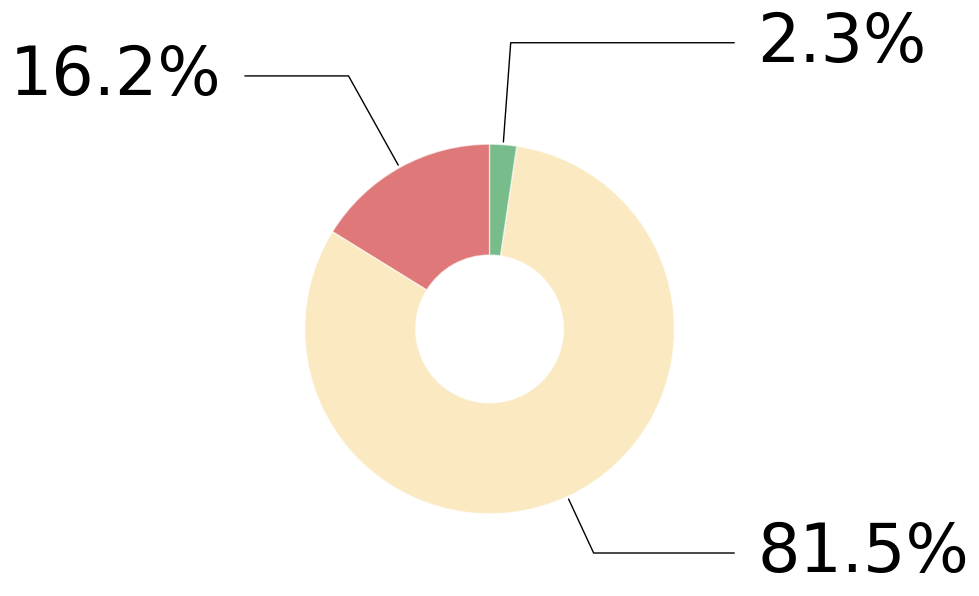

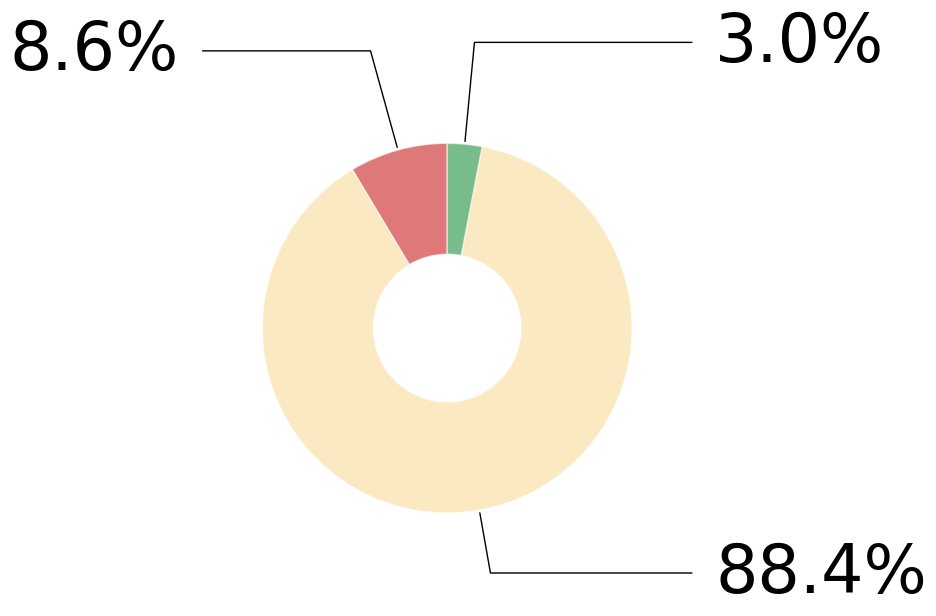

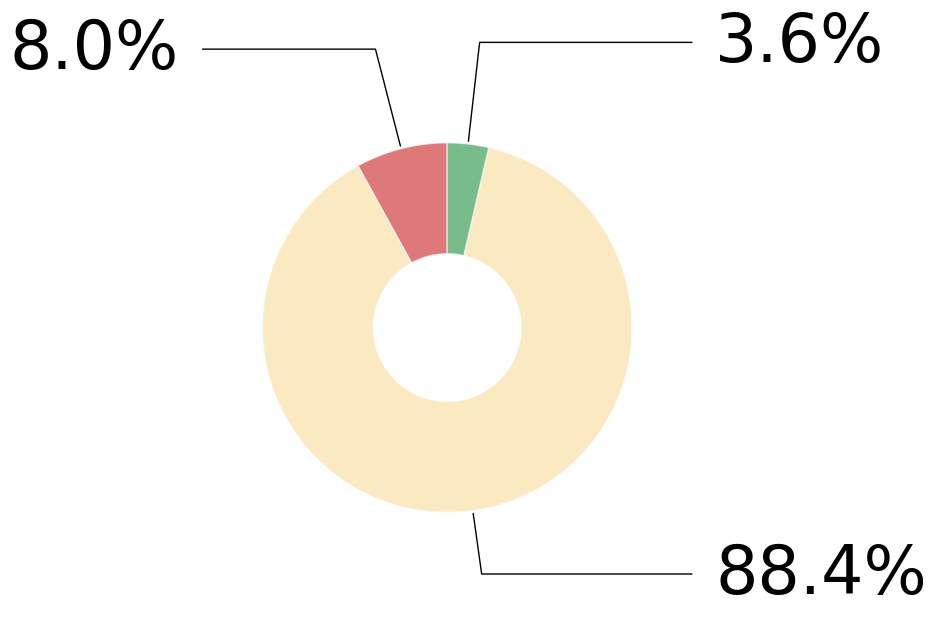

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 假设 df_pivot3 是你的 DataFrame
# df_pivot3 = ...

# 筛选数据，选择特定行业和年份
selected_data = df_pivot3[(df_pivot3['Industry'] == 'Manufacture of Chemical and Allied Products, Oil and Coal Products') &
                          (df_pivot3['Year'].isin([1990, 2015, 2020]))]

# 设置颜色
colors = ['#cb1e1f', '#f8db98', '#20903f']

# 遍历每个年份，绘制饼状图
for year in [1990, 2015, 2020]:
    data_for_year = selected_data[selected_data['Year'] == year]

    # 计算每种燃料排放占总排放的百分比
    total_emission = data_for_year[['Coal', 'Oil', 'Gas']].sum(axis=1)
    percentages = (data_for_year[['Coal', 'Oil', 'Gas']].T / total_emission * 100).T

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

    # 调整中间空心圆的大小
    wedges, texts, autotexts = ax.pie(percentages.values.flatten(),
                                       autopct='',
                                       startangle=90, colors=colors, wedgeprops=dict(width=0.6, edgecolor='w'))

    # 设置环形部分为半透明
    for wedge in wedges:
        wedge.set_alpha(0.6)

    # 添加白色描边
    for wedge in wedges:
        wedge.set_edgecolor('white')

    # 标注每种燃料的百分比
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=dict(boxstyle="square", edgecolor='w', facecolor='w'))
    for i, (text, autotext, percent) in enumerate(zip(texts, autotexts, percentages.values.flatten())):
        ang = (wedges[i].theta2 - wedges[i].theta1) / 2. + wedges[i].theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})

        # 调整标注字体的大小
        ax.annotate(f'{percent:.1f}%', xy=(x, y), xytext=(1.45*np.sign(x), 1.45*y),
                    horizontalalignment=horizontalalignment, fontsize=48, **kw)

    # plt.title(f'{year}', pad=20, fontsize=16)
    plt.show()


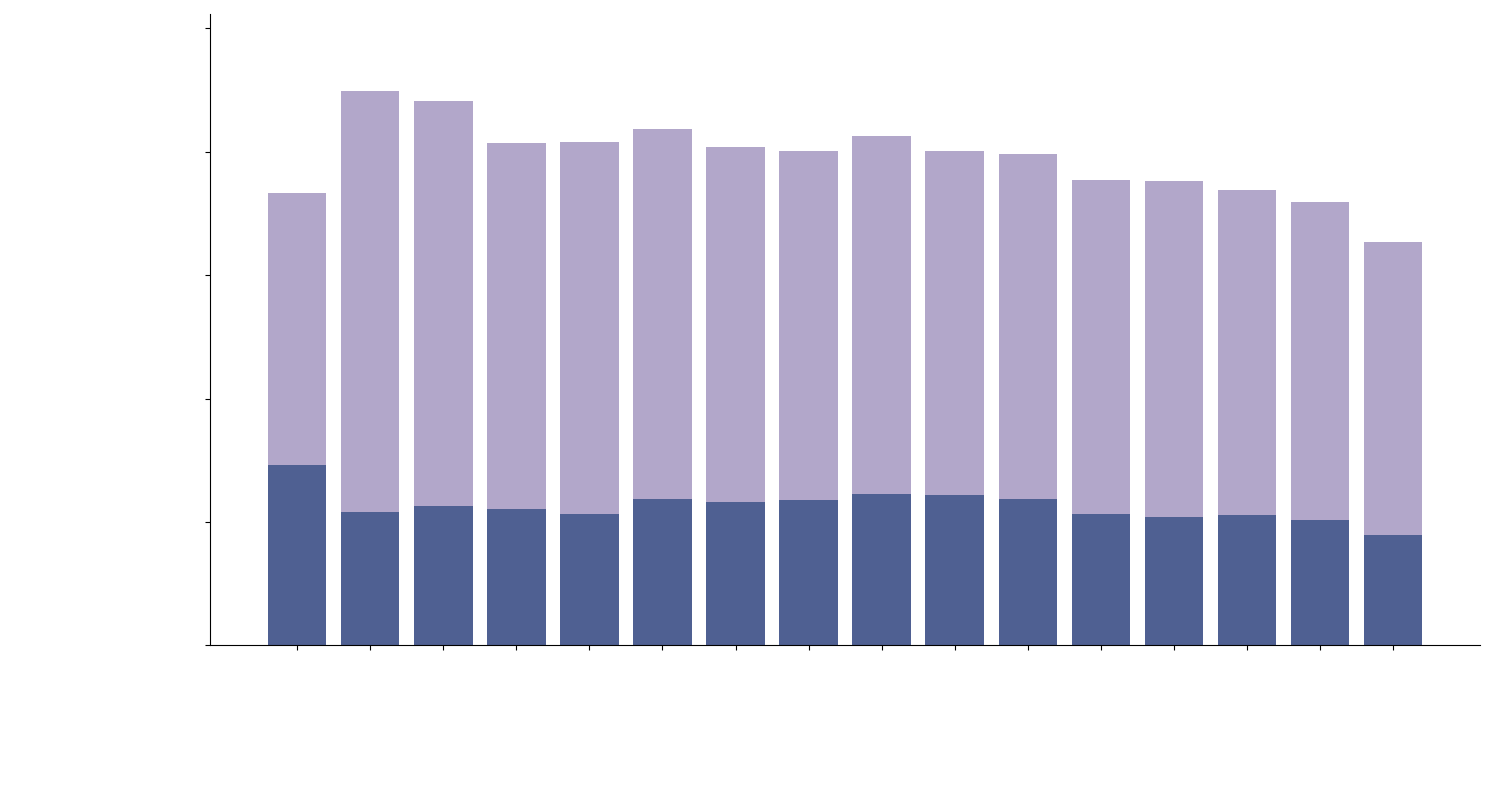

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ...（你的数据处理部分）

# 计算每一年每个Industry和燃料类型的碳排放总和
df_pivot3 = emission3.groupby(['Year'])[['Coal', 'Oil', 'Gas']].sum().reset_index()
df_pivot3['sum'] = df_pivot3[['Coal', 'Oil', 'Gas']].sum(axis=1)

# 计算每一年每个Industry和燃料类型的碳排放百分比
df_pivot3['Coal_Percentage'] = df_pivot3['Coal'] / df_pivot3['sum'] * 100
df_pivot3['Oil_Percentage'] = df_pivot3['Oil'] / df_pivot3['sum'] * 100
df_pivot3['Gas_Percentage'] = df_pivot3['Gas'] / df_pivot3['sum'] * 100

# 绘制百分比柱状图
fig, ax = plt.subplots(figsize=(15, 8))

# 设置颜色
colors = ['#4F6092', '#B2A7CA', '#FFFFFF']

# 绘制堆叠柱状图
bottom = 0
for fuel, color in zip(['Coal', 'Oil', 'Gas'], colors):
    ax.bar(np.arange(len(df_pivot3['Year'])), df_pivot3[fuel], bottom=bottom, color=color, label=fuel[:-11])
    bottom += df_pivot3[fuel]

# 隐藏上方和右方的坐标轴
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 将画布、图表背景、绘图区背景设置为透明
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
ax.set_facecolor('none')

# 添加标签和标题
# ax.set_xlabel('Year')
ax.set_xticks(np.arange(len(df_pivot3['Year'])))
ax.set_xticklabels(df_pivot3['Year'].astype(str).unique(), color = 'w', fontsize = 36, rotation = 45)
# ax.set_yticklabels([0,20,40,60,80,100], color = 'w',fontsize = 36)
ax.set_yticklabels([0,50000,100000,150000,200000,250000], color = 'w',fontsize = 36)
# ax.set_ylabel('Percentage')

# 添加图例
# ax.legend()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/SD/Figure/bar%.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
df_pivot3['Year']

0     1990
1     2005
2     2007
3     2008
4     2009
5     2010
6     2011
7     2012
8     2013
9     2014
10    2015
11    2016
12    2017
13    2018
14    2019
15    2020
Name: Year, dtype: int64

In [ ]:
df_pivot3.pivot(index='Year', columns='Industry', values='Coal_Percentage').values.T

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.79022681e-04, 4.41754528e-04,
        3.68374178e-04, 3.84897183e-04, 4.82291019e-04, 4.79206155e-04,
        4.33478991e-04, 4.55721030e-04, 4.78081117e-04, 5.19846920e-04,
        5.88496621e-04, 7.28496153e-04, 7.23502898e-04, 9.38024232e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000

In [ ]:
year = 1990
df_pivot3 = emission3.loc[emission3['Year'] == year].pivot_table(index='Year', columns='Industry', values=['Coal', 'Oil', 'Gas'], aggfunc='sum', fill_value=0)

# 创建颜色映射
norm = Normalize()
cmap = plt.get_cmap('viridis')

# 绘制三维堆积柱状图
fig3 = plt.figure(figsize=(30, 12))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.view_init(elev=30, azim=60)

# 设置网格线颜色和样式
ax3.w_xaxis.pane.set_color('w');
ax3.w_yaxis.pane.set_color('w');
ax3.w_zaxis.pane.set_color('w');

# ax.grid(color='gray', linestyle='solid', linewidth=0.5, axis = 'z')
plt.rcParams['grid.color'] = "grey"
mpl.rcParams['lines.linewidth'] = 0.05
ax3.grid(False, axis = 'x')
ax3.grid(False, axis = 'y')

xs = np.arange(len(df_pivot3.index))

for j, industry in enumerate(emission3['Industry'].unique()):
    for i, fuel in enumerate(['Coal','Oil','Gas']):
        zs_coal = df_pivot3.loc[year, (fuel, industry)]
        # zs_oil = df_pivot2.loc[year, ('Oil', industry)]
        # zs_gas = df_pivot2.loc[year, ('Gas', industry)]

        ax3.bar3d(i, j, 0, 0.3, 0.3, zs_coal, color='#26547C', alpha=1, shade=True, edgecolor = None)
        # ax2.bar3d(i, j, zs_coal, 0.3, 0.3, zs_oil, color='#EF476F', alpha=0.7, shade=False, edgecolor='k', linewidth = 0.2)
        # ax2.bar3d(i, j, zs_coal + zs_oil, 0.3, 0.3, zs_gas, color='#FFD166', alpha=0.7, shade=False, edgecolor='k', linewidth = 0.2)


# 设置 x 轴刻度标签
ax2.set_xticks(np.arange(len(df_pivot2.index[::-1])))
ax2.set_xticklabels(df_pivot2.index[::-1], rotation=0)

# 设置 y 轴刻度标签
ax2.set_yticks(np.arange(len(emission3['Industry'].unique())))
ax2.set_yticklabels(emission3['Industry'].unique(), horizontalalignment = 'right', rotation=17.5)

# 设置其他标签
# ax.set_xlabel('Year')
# ax.set_ylabel('Industry')
# ax.set_zlabel('Carbon Emission')
# ax.set_title('Carbon Emission by Industry Over Years')

# 设置 equal 参数，使得 x、y 和 z 轴的比例相同
ax2.set_box_aspect([1, 1.8, 0.4])

plt.legend()
plt.tight_layout()
plt.show()

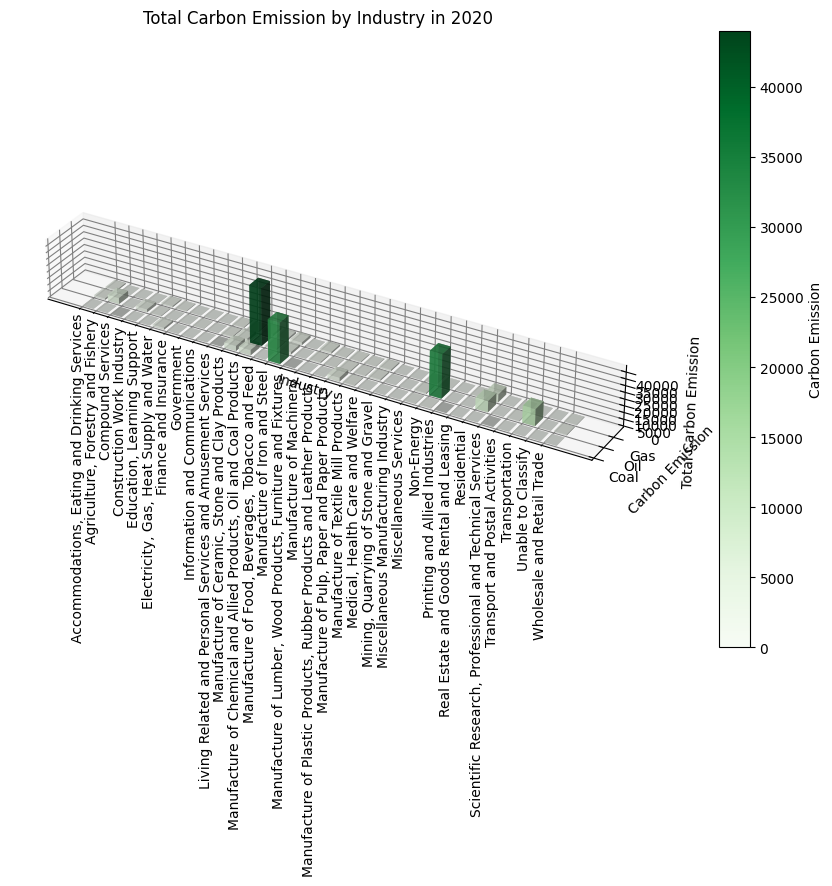

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource, Normalize
from io import StringIO


# 将数据转换为DataFrame
df = emission3

# 选择特定年份（例如1990）
selected_year = 2020
selected_data = df[df['Year'] == selected_year]

# 按照Industry列进行求和
summed_data = selected_data.groupby('Industry')[['Coal', 'Oil', 'Gas']].sum()

# 计算最小和最大值
min_value = summed_data.values.min()
max_value = summed_data.values.max()

# 创建颜色映射，并设置归一化范围
norm = Normalize(vmin=min_value, vmax=max_value)
cmap = plt.get_cmap('Greens')

# 绘制三维柱状图
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

industries = summed_data.index
fuels = ['Coal', 'Oil', 'Gas']

for i, industry in enumerate(industries):
    for j, fuel in enumerate(fuels):
        emission = summed_data.loc[industry][fuel]

        # 计算颜色值
        color = cmap(norm(emission))

        ax.bar3d(i, j, 0, 0.8, 0.8, emission, color=color, alpha=0.7, shade=True, linewidth=0.5)

# 设置 x 轴刻度标签
ax.set_xticks(np.arange(len(industries)))
ax.set_xticklabels(industries, rotation='vertical')

# 设置 y 轴刻度标签
ax.set_yticks(np.arange(len(fuels)))
ax.set_yticklabels(fuels, rotation='horizontal')


# 设置其他标签
ax.set_xlabel('Industry')
ax.set_ylabel('Carbon Emission')
ax.set_zlabel('Total Carbon Emission')
ax.set_title(f'Total Carbon Emission by Industry in {selected_year}')

# 设置 equal 参数，使得 x、y 和 z 轴的比例相同
ax.set_box_aspect([9, 1, 1])

# 添加颜色映射条
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=0.1)
cbar.set_label('Carbon Emission')

plt.show()

In [ ]:
selected_data

,Prefecture,Industry,産業,Coal,Oil,Gas,Year
31,aichi,Residential,家 庭,0.000000,395.440509,310.471031,1990
32,aichi,Transportation,運 輸,0.000000,706.958326,0.000000,1990
35,aichi,Non-Energy,非ｴﾈﾙｷﾞｰ利用,0.000000,401.017240,1.745342,1990
69,akita,Residential,家 庭,0.000000,230.582376,23.724908,1990
70,akita,Transportation,運 輸,0.000000,99.836486,0.000000,1990
...,...,...,...,...,...,...,...
1774,yamanashi,"Medical, Health Care and Welfare",医療･福祉,0.000000,7.036613,1.416046,1990
1775,yamanashi,Compound Services,複合サービス事業,0.000000,0.644837,0.015595,1990
1776,yamanashi,Miscellaneous Services,他サービス業,0.686227,8.412018,0.460829,1990
1777,yamanashi,Government,公 務,0.000000,0.862031,0.075893,1990


##

# 数据整理

In [2]:
## 输入文件夹
folder_path = "/content/drive/MyDrive/SD/1990-2020JPemission"
## 输出文件夹
output_folder_path = "/content/drive/MyDrive/SD/Output"
## 关键变量
file_names = os.listdir(folder_path) ## 输入文件列表
file_names.sort()
prefecture_names = [file_name.split('.')[0].lstrip('0123456789').rstrip('.') for file_name in file_names] ## 都道府县列表
sheet_names = pd.ExcelFile(os.path.join(folder_path, "01hokkaidou.xls")).sheet_names[:16] ## 表名列表

# 人口数据

In [3]:
pop = pd.read_excel('/content/drive/MyDrive/SD/1995-2020JPpopulation.xlsx', header = 8)
pop = pop.iloc[2:49]
pop = pop.drop(columns = [2000,2001,2002,2003,2004,2006])
pop = pop.rename(columns = dict(zip(pop.columns[4:], sheet_names))).reset_index()
pop = pop.rename(columns = {'Unnamed: 3': 'Prefecture', 'Unnamed: 2': '都道府県'})
pop['Prefecture'] = prefecture_names
pop.iloc[:,5:] = pop.iloc[:,5:] * 1000
pop = pop.iloc[:,3:]
pop.replace('\s+','', regex = True, inplace = True)
pop.to_excel(os.path.join(output_folder_path, '1990-2020JPpopulation.xlsx'))
pop

,都道府県,Prefecture,90FY,05FY,07FY,08FY,09FY,10FY,11FY,12FY,13FY,14FY,15FY,16FY,17FY,18FY,19FY,20FY
0,北海道,hokkaidou,5643647.0,5628000,5579000.0,5548000.0,5524000.0,5506000,5488000.0,5465000.0,5438000.0,5410000.0,5382000,5355000.0,5325000.0,5293000.0,5259000.0,5225000
1,青森県,aomori,1482873.0,1437000,1409000.0,1395000.0,1383000.0,1373000,1363000.0,1350000.0,1337000.0,1323000.0,1308000,1295000.0,1282000.0,1268000.0,1253000.0,1238000
2,岩手県,iwate,1416928.0,1385000,1364000.0,1352000.0,1340000.0,1330000,1315000.0,1306000.0,1299000.0,1290000.0,1280000,1268000.0,1254000.0,1240000.0,1226000.0,1211000
3,宮城県,miyagi,2248558.0,2360000,2354000.0,2349000.0,2348000.0,2348000,2326000.0,2329000.0,2333000.0,2335000.0,2334000,2332000.0,2326000.0,2320000.0,2312000.0,2302000
4,秋田県,akita,1227478.0,1146000,1121000.0,1109000.0,1097000.0,1086000,1075000.0,1063000.0,1050000.0,1037000.0,1023000,1011000.0,999000.0,985000.0,972000.0,960000
5,山形県,yamagata,1258390.0,1216000,1198000.0,1188000.0,1178000.0,1169000,1162000.0,1153000.0,1144000.0,1134000.0,1124000,1114000.0,1103000.0,1092000.0,1080000.0,1068000
6,福島県,fukushima,2104058.0,2091000,2067000.0,2054000.0,2041000.0,2029000,1988000.0,1957000.0,1940000.0,1927000.0,1914000,1903000.0,1886000.0,1869000.0,1852000.0,1833000
7,茨城県,ibaraki,2845382.0,2975000,2973000.0,2971000.0,2970000.0,2970000,2960000.0,2947000.0,2937000.0,2927000.0,2917000,2910000.0,2902000.0,2892000.0,2879000.0,2867000
8,栃木県,tochigi,1935168.0,2017000,2016000.0,2015000.0,2011000.0,2008000,2000000.0,1992000.0,1986000.0,1980000.0,1974000,1969000.0,1962000.0,1953000.0,1943000.0,1933000
9,群馬県,gunma,1966265.0,2024000,2020000.0,2017000.0,2014000.0,2008000,2001000.0,1994000.0,1986000.0,1979000.0,1973000,1969000.0,1963000.0,1957000.0,1949000.0,1939000


# 电力数据

In [4]:
eh = pd.read_excel('/content/drive/MyDrive/SD/Electricity_heat.xlsx')
em = pd.read_excel('/content/drive/MyDrive/SD/Electricity_emission.xlsx')
em

,Company,Prefecture,Max_Output,Ratio,Electricity,Year
0,中国電力,okayama,656.0,0.238026,3555.061967,1990
1,中国電力,yamaguchi,2100.0,0.761974,11380.533735,1990
2,中部電力,aichi,2850.0,0.614887,26502.166070,1990
3,中部電力,mie,1785.0,0.385113,16598.725065,1990
4,九州電力,fukuoka,1475.0,0.375480,5844.847297,1990
...,...,...,...,...,...,...
519,沖縄電力,okinawa,1093.0,1.000000,4994.373069,2020
520,関西電力,hyougo,2174.5,0.347948,14574.759748,2020
521,関西電力,kyouto,1275.0,0.204016,8545.789229,2020
522,関西電力,osaka,1600.0,0.256020,10724.127660,2020


# 热量

In [5]:
writer = pd.ExcelWriter('/content/drive/MyDrive/SD/Output/Heat.xlsx')
# 遍历所有sheet
for sheet_name in tqdm(sheet_names, ncols = 500):
    # 创建空表格储存数据
    Heat = pd.DataFrame()
    # 遍历文件夹中所有文件
    for file_name in file_names:
        # 读取Excel文件中的数据
        file_path = os.path.join(folder_path, file_name)
        data = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
        # 提取出72到128行的数据
        data = data.iloc[71:128, :]
        # 将72行设为表头
        new_header = data.iloc[0]
        data = data[1:]
        data.columns = new_header
        # 删除指定的行
        data = data.drop(index=[72, 73, 74, 75, 76, 77, 78, 80, 82, 85, 89, 102]).dropna(how="all").dropna(axis=1, how="all")
        # 合并数据
        data.insert(loc=11, column='Gas', value=data['Natural Gas'] + data['Town Gas'])
        data['Coal'] = data['Coal'] + data['Coal Products']
        data['Oil'] = data['Oil'] + data['Oil Products']
        # 删除指定的列
        data = data.drop(columns=['Coal Products', 'Oil Products', '軽質油製品', '重質油製品', '石油ガス', 'Natural Gas', 'Town Gas'])
        # 将第一列重命名为Prefecture，并让值等于表格文件名中去掉数字之后小数点前的字符串
        column_names = data.columns.values
        column_names[0:4] = ["Prefecture", "Code", "Sector", "産業"]
        data = data[column_names[:7]]
        prefecture = file_name.split('.')[0].lstrip('0123456789').rstrip('.')
        data["Prefecture"] = prefecture
        data['Sector'] = data['Sector'].str.strip()

        # 根据 "Sector" 列的不同值对 "Code" 列进行赋值
        data.loc[data['Sector'] == 'Unable to Classify', 'Code'] = 'U'
        data.loc[data['Sector'] == 'Transportation', 'Code'] = 'T'
        data.loc[data['Code'] == 'Non-Energy', 'Sector'] = 'Non-Energy'

        # 删除 Code 列值为空值或为 "Final Energy Consumption" 的行
        data = data[(data['Code'].notnull()) & (data['Code'] != ' Final Energy Consumption')]

        # 添加电力数据
        if sheet_name == '90FY':
          year = int('19' + sheet_name[:-2])
        else:
          year = int('20' + sheet_name[:-2])

        eh_df = eh.loc[eh['Year'] == year]

        data = data.merge(eh_df[['Prefecture','Electricity']], on = 'Prefecture', how = 'left')
        data.loc[data['Code'] != 'F', 'Electricity'] = 0

        Heat = pd.concat([Heat, data], ignore_index=True)

    Heat['Electricity'] = Heat['Electricity'].fillna(0)
    Heat.to_excel(writer, sheet_name = sheet_name, index = False)
    writer.save()
writer.close()

  0%|                                                                                                         …

# 碳排



In [7]:
writer =pd.ExcelWriter('/content/drive/MyDrive/SD/Output/Emission.xlsx')
# 遍历所有sheet
for sheet_name in tqdm(sheet_names, ncols = 500):
    # 创建空表格储存数据
    Emission = pd.DataFrame()
    # 遍历文件夹中所有文件
    for file_name in file_names:
        # 读取Excel文件中的数据
        file_path = os.path.join(folder_path, file_name)
        data = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
        # 提取出72到128行的数据
        data = data.iloc[139:196, :]
        # 将72行设为表头
        new_header = data.iloc[0]
        data = data[1:]
        data.columns = new_header
        # 删除指定的行
        data = data.drop(index=[140, 141, 142, 143, 144, 145, 146, 148, 150, 153, 157, 170]).dropna(how="all").dropna(axis=1, how="all")
        # 合并数据
        data.insert(loc=11, column='Gas', value=data['Natural Gas'] + data['Town Gas'])
        data['Coal'] = data['Coal'] + data['Coal Products']
        data['Oil'] = data['Oil'] + data['Oil Products']
        # 删除指定的列
        data = data.drop(columns=['Coal Products', 'Oil Products', '軽質油製品', '重質油製品', '石油ガス', 'Natural Gas', 'Town Gas'])
        # 将第一列重命名为Prefecture，并让值等于表格文件名中去掉数字之后小数点前的字符串
        column_names = data.columns.values
        column_names[0:4] = ["Prefecture", "Code", "Sector", "産業"]
        data = data[column_names[:7]]
        prefecture = file_name.split('.')[0].lstrip('0123456789').rstrip('.')
        data["Prefecture"] = prefecture
        data['Sector'] = data['Sector'].str.strip()

        # 根据 "Sector" 列的不同值对 "Code" 列进行赋值
        data.loc[data['Sector'] == 'Unable to Classify', 'Code'] = 'U'
        data.loc[data['Sector'] == 'Transportation', 'Code'] = 'T'
        data.loc[data['Code'] == 'Non-Energy', 'Sector'] = 'Non-Energy'

        # 删除 Code 列值为空值或为 "Final Energy Consumption" 的行
        data = data[(data['Code'].notnull()) & (data['Code'] != ' Final Energy Consumption')]

        # 将t碳换算成1000t二氧化碳
        data.iloc[:, -3:] = data.iloc[:, -3:] * 44 / 12

        # 添加电力数据
        if sheet_name == '90FY':
          year = int('19' + sheet_name[:-2])
        else:
          year = int('20' + sheet_name[:-2])

        em_df = em.loc[em['Year'] == year]

        data = data.merge(em_df[['Prefecture','Electricity']], on = 'Prefecture', how = 'left')
        data.loc[data['Code'] != 'F', 'Electricity'] = 0

        Emission = pd.concat([Emission, data], ignore_index=True)

    Emission['Electricity'] = Emission['Electricity'].fillna(0)
    Emission.to_excel(writer, sheet_name = sheet_name, index = False)
    writer.save()
writer.close()

  0%|                                                                                                         …

# 人均热量

In [13]:
writer = pd.ExcelWriter('/content/drive/MyDrive/SD/Output/Heat_per_capita.xlsx')
# 遍历所有sheet
for sheet_name in tqdm(sheet_names, ncols = 500):
    # 创建空表格储存数据
    Heat = pd.DataFrame()
    # 遍历文件夹中所有文件
    for file_name in file_names:
        # 读取Excel文件中的数据
        file_path = os.path.join(folder_path, file_name)
        data = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
        # 提取出72到128行的数据
        data = data.iloc[71:128, :]
        # 将72行设为表头
        new_header = data.iloc[0]
        data = data[1:]
        data.columns = new_header
        # 删除指定的行
        data = data.drop(index=[72, 73, 74, 75, 76, 77, 78, 80, 82, 85, 89, 102]).dropna(how="all").dropna(axis=1, how="all")
        # 合并数据
        data.insert(loc=11, column='Gas', value=data['Natural Gas'] + data['Town Gas'])
        data['Coal'] = data['Coal'] + data['Coal Products']
        data['Oil'] = data['Oil'] + data['Oil Products']
        # 删除指定的列
        data = data.drop(columns=['Coal Products', 'Oil Products', '軽質油製品', '重質油製品', '石油ガス', 'Natural Gas', 'Town Gas'])
        # 将第一列重命名为Prefecture，并让值等于表格文件名中去掉数字之后小数点前的字符串
        column_names = data.columns.values
        column_names[0:4] = ["Prefecture", "Code", "Sector", "産業"]
        data = data[column_names[:7]]
        prefecture = file_name.split('.')[0].lstrip('0123456789').rstrip('.')
        data["Prefecture"] = prefecture
        data['Sector'] = data['Sector'].str.strip()

        # 根据 "Sector" 列的不同值对 "Code" 列进行赋值
        data.loc[data['Sector'] == 'Unable to Classify', 'Code'] = 'U'
        data.loc[data['Sector'] == 'Transportation', 'Code'] = 'T'
        data.loc[data['Code'] == 'Non-Energy', 'Sector'] = 'Non-Energy'

        # 删除 Code 列值为空值或为 "Final Energy Consumption" 的行
        data = data[(data['Code'].notnull()) & (data['Code'] != ' Final Energy Consumption')]

        # 添加电力数据
        if sheet_name == '90FY':
          year = int('19' + sheet_name[:-2])
        else:
          year = int('20' + sheet_name[:-2])

        eh_df = eh.loc[eh['Year'] == year]

        data = data.merge(eh_df[['Prefecture','Electricity']], on = 'Prefecture', how = 'left')
        data.loc[data['Code'] != 'F', 'Electricity'] = 0

        # 计算人均
        jinko = pop.loc[pop['Prefecture']==prefecture][sheet_name].values[0]
        data.iloc[:,-4:] = data.iloc[:,4:].apply(lambda x: x/jinko)
        # 拼接表格
        Heat = pd.concat([Heat, data], ignore_index=True)

    Heat['Electricity'] = Heat['Electricity'].fillna(0)
    Heat.to_excel(writer, sheet_name = sheet_name, index = False)
    writer.save()
writer.close()

  0%|                                                                                                         …

# 人均碳排

In [8]:
writer = pd.ExcelWriter('/content/drive/MyDrive/SD/Output/Emission_per_capita.xlsx')
# 遍历所有sheet
for sheet_name in tqdm(sheet_names, ncols = 500):
    # 创建空表格储存数据
    Emission = pd.DataFrame()
    # 遍历文件夹中所有文件
    for file_name in file_names:
        # 读取Excel文件中的数据
        file_path = os.path.join(folder_path, file_name)
        data = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
        # 提取出72到128行的数据
        data = data.iloc[139:196, :]
        # 将72行设为表头
        new_header = data.iloc[0]
        data = data[1:]
        data.columns = new_header
        # 删除指定的行
        data = data.drop(index=[140, 141, 142, 143, 144, 145, 146, 148, 150, 153, 157, 170]).dropna(how="all").dropna(axis=1, how="all")
        # 合并数据
        data.insert(loc=11, column='Gas', value=data['Natural Gas'] + data['Town Gas'])
        data['Coal'] = data['Coal'] + data['Coal Products']
        data['Oil'] = data['Oil'] + data['Oil Products']
        # 删除指定的列
        data = data.drop(columns=['Coal Products', 'Oil Products', '軽質油製品', '重質油製品', '石油ガス', 'Natural Gas', 'Town Gas'])

        # 将第一列重命名为Prefecture，并让值等于表格文件名中去掉数字之后小数点前的字符串
        column_names = data.columns.values
        column_names[0:4] = ["Prefecture", "Code", "Sector", "産業"]
        data = data[column_names[:7]]
        prefecture = file_name.split('.')[0].lstrip('0123456789').rstrip('.')
        data["Prefecture"] = prefecture
        data['Sector'] = data['Sector'].str.strip()

        # 根据 "Sector" 列的不同值对 "Code" 列进行赋值
        data.loc[data['Sector'] == 'Unable to Classify', 'Code'] = 'U'
        data.loc[data['Sector'] == 'Transportation', 'Code'] = 'T'
        data.loc[data['Code'] == 'Non-Energy', 'Sector'] = 'Non-Energy'

        # 删除 Code 列值为空值或为 "Final Energy Consumption" 的行
        data = data[(data['Code'].notnull()) & (data['Code'] != ' Final Energy Consumption')]

        # 将t碳换算成1000t二氧化碳
        data.iloc[:, -3:] = data.iloc[:, -3:] * 44 / 12

        # 添加电力数据
        if sheet_name == '90FY':
          year = int('19' + sheet_name[:-2])
        else:
          year = int('20' + sheet_name[:-2])

        em_df = em.loc[em['Year'] == year]

        data = data.merge(em_df[['Prefecture','Electricity']], on = 'Prefecture', how = 'left')
        data.loc[data['Code'] != 'F', 'Electricity'] = 0

        # 计算人均
        jinko = pop.loc[pop['Prefecture']==prefecture][sheet_name].values[0]
        data.iloc[:,4:] = data.iloc[:,4:].apply(lambda x: x/jinko)

        # 拼接表格
        Emission = pd.concat([Emission, data], ignore_index=True)

    Emission['Electricity'] = Emission['Electricity'].fillna(0)
    Emission.to_excel(writer, sheet_name = sheet_name, index = False)
    writer.save()
writer.close()

  0%|                                                                                                         …

# GDP数据

In [ ]:
gdp_sheet_names = pd.ExcelFile('/content/drive/MyDrive/SD/1990-2019JPgdp.xlsx').sheet_names
save_sheet_names = ['90FY'] + [str(i).rjust(2,'0') + 'FY' for i in range(0,20)]
writer = pd.ExcelWriter('/content/drive/MyDrive/SD/Output/1990-2019JPgdp.xlsx')

for i, gdp_sheet_name in enumerate(tqdm(gdp_sheet_names, ncols = 500)):

  gdp = pd.read_excel('/content/drive/MyDrive/SD/1990-2019JPgdp.xlsx', sheet_name=gdp_sheet_name)
  column_list_sort = ['Agriculture, Forestry and Fishery',
            'Mining, Quarrying of Stone and Gravel',
            'Manufacturing, Auto Power Generation',
            'Construction Work Industry',
            'Electricity, Gas, Heat Supply and Water',
            'Wholesale and Retail Trade',
            'Finance and Insurance',
            'Real Estate and Goods Rental and Leasing',
            'Transport and Communications',
            'Services',
            'Others']
  if i < 2:

    gdp.iloc[3,1] = '都道府県'
    gdp.iloc[3,0] = 'id'
    gdp.iloc[3,34] = '対家計民間非営利サービス生産者'
    gdp.columns = gdp.iloc[3]
    gdp = gdp.dropna(axis=1, how='all', subset=[3])
    gdp = gdp.iloc[gdp[(gdp['id']=='01')].index[0]:gdp[(gdp['id']=='47')].index[0]+1].reset_index(drop = True)
    gdp.insert(loc=2, column='Prefecture', value = prefecture_names)
    gdp.iloc[:,7] = gdp.iloc[:,7] + gdp.iloc[:,13]
    gdp.iloc[:,12] = gdp.iloc[:,12] + gdp.iloc[:,14] + gdp.iloc[:,-1]
    gdp = pd.concat([gdp.iloc[:,:13], gdp.iloc[:,15]], axis = 1)
    new_column_list = gdp.columns.tolist()[:3] + column_list_sort
    gdp.columns = new_column_list

  elif i < 7:

    gdp.iloc[4,1] = '都道府県'
    gdp.iloc[4,0] = 'id'
    gdp.iloc[4,63] = '対家計民間非営利サービス生産者'
    gdp.columns = gdp.iloc[4]
    gdp = gdp.dropna(axis=1, how='all', subset=[4])
    gdp = gdp.iloc[gdp[(gdp['id']=='01')].index[0]:gdp[(gdp['id']=='47')].index[0]+1].reset_index(drop = True)
    gdp.insert(loc=2, column='Prefecture', value = prefecture_names)
    gdp.iloc[:,11] = gdp.iloc[:,11] + gdp.iloc[:,12]
    gdp.iloc[:,7] = gdp.iloc[:,7] + gdp.iloc[:,14]
    gdp.iloc[:,13] = gdp.iloc[:,13] + gdp.iloc[:,15] + gdp.iloc[:,-1]
    gdp = pd.concat([gdp.iloc[:,:12], gdp.iloc[:,13], gdp.iloc[:,-2]], axis = 1)
    new_column_list = gdp.columns.tolist()[:3] + column_list_sort
    gdp.columns = new_column_list

  else:

    column_list = ['Agriculture, Forestry and Fishery',
            'Mining, Quarrying of Stone and Gravel',
            'Manufacturing, Auto Power Generation',
            'Electricity, Gas, Heat Supply and Water',
            'Construction Work Industry',
            'Wholesale and Retail Trade',
            'Transport and Communications',
            'Services',
            'Finance and Insurance',
            'Real Estate and Goods Rental and Leasing',
            'Others']

    gdp.iloc[3,1] = '都道府県'
    gdp.iloc[3,0] = 'id'
    gdp.columns = gdp.iloc[3]
    gdp = gdp.dropna(axis=1, how='all', subset=[3])
    gdp = gdp.iloc[gdp[(gdp['id']=='01')].index[0]:gdp[(gdp['id']=='47')].index[0]+1].reset_index(drop = True)
    gdp.insert(loc=2, column='Prefecture', value = prefecture_names)
    gdp.iloc[:,9] = gdp.iloc[:,9] + gdp.iloc[:,11]
    gdp.iloc[:,10] = gdp.iloc[:,10] + gdp.iloc[:,14] + gdp.iloc[:,16] + gdp.iloc[:,17] + gdp.iloc[:,18]
    gdp = pd.concat([gdp.iloc[:,:11], gdp.iloc[:,12:14], gdp.iloc[:,15]], axis = 1)
    new_column_list = gdp.columns.tolist()[:3] + column_list
    gdp.columns = new_column_list
    gdp = gdp[gdp.columns.tolist()[:3] + column_list_sort]


  gdp['Industry'] = gdp.iloc[:,3:].sum(axis=1)
  gdp.to_excel(writer, sheet_name = save_sheet_names[i], index = False)
  writer.save()
writer.close()

  0%|                                                                                                         …

# gdp均热量

In [14]:
writer = pd.ExcelWriter('/content/drive/MyDrive/SD/Output/Heat_per_gdp.xlsx')

# 定义计算函数
def CalculatePerGdp(df, industry, prefecture, gdp):

  g = float(gdp.loc[gdp['Prefecture'] == prefecture][industry])
  df = df / g

  return df

# 遍历所有sheet
for sheet_name in tqdm(sheet_names[:-1], ncols = 500):

  # 创建空表格储存数据
  Heat = pd.DataFrame()

  # 遍历文件夹中所有文件
  for file_name in file_names:

    # 读取Excel文件中的数据
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
    gdp = pd.read_excel('/content/drive/MyDrive/SD/Socialeconomic data/Excel/1990-2019JPgdp.xlsx', sheet_name=sheet_name)

    # 提取出72到128行的数据
    data = data.iloc[71:128, :]
    # 将72行设为表头
    new_header = data.iloc[0]
    data = data[1:]
    data.columns = new_header
    # 删除指定的行
    data = data.drop(index=[72, 73, 74, 75, 76, 77, 78, 80, 82, 85, 102]).dropna(how="all").dropna(axis=1, how="all")
    data = data.drop(index=[i for i in range(90,101)])
    data = data.drop(index=[119, 121, 122, 123, 125, 126, 127])
    # 合并数据
    data.insert(loc=11, column='Gas', value=data['Natural Gas'] + data['Town Gas'])
    data['Coal'] = data['Coal'] + data['Coal Products']
    data['Oil'] = data['Oil'] + data['Oil Products']
    # 删除指定的列
    data = data.drop(columns=['Coal Products', 'Oil Products', '軽質油製品', '重質油製品', '石油ガス', 'Natural Gas', 'Town Gas'])
    # 重命名列
    column_names = data.columns.values
    column_names[0:4] = ["Prefecture", "Code", "Sector", "産業"]
    data = data[column_names[:7]]
    prefecture = file_name.split('.')[0].lstrip('0123456789').rstrip('.')
    # 完善数据
    data["Prefecture"] = prefecture
    data['Sector'] = data['Sector'].str.strip()
    data.reset_index(drop = True, inplace = True)
    data.iloc[7,4:] = data.iloc[7:9,4:].cumsum().iloc[-1]
    data.iloc[18,4:] = data.iloc[12:19,4:].cumsum().iloc[-1]
    data.iloc[20,4:] = data.iloc[19:,4:].cumsum().iloc[-1]
    data = data.drop(index=[8,12,13,14,15,16,17,19])
    data.loc[7,'Sector'] = 'Transport and Communications'
    data.loc[7,'産業'] = '運輸・通信業'
    data.loc[18,'Sector'] = 'Services'
    data.loc[18,'産業'] = 'サービス業'
    data.loc[20,'Sector'] = 'Others'
    data.loc[20,'産業'] = '他の産業'
    data = data.iloc[1:].reset_index(drop = True)

    data.loc[data['Sector'] == 'Others', 'Code'] = 'O'

    # 删除 Code 列值为空值或为 "Final Energy Consumption" 的行
    data = data[(data['Code'].notnull()) & (data['Code'] != ' Final Energy Consumption')]

    # 添加电力数据
    if sheet_name == '90FY':
      year = int('19' + sheet_name[:-2])
    else:
      year = int('20' + sheet_name[:-2])

    eh_df = eh.loc[eh['Year'] == year]

    data = data.merge(eh_df[['Prefecture','Electricity']], on = 'Prefecture', how = 'left')
    data.loc[data['Code'] != 'F', 'Electricity'] = 0

    # 遍历行计算每单位gdp对应的排放
    for i,row in data.iterrows():
      data.iloc[i,4:] = CalculatePerGdp(data.iloc[i,4:], row['Sector'], row['Prefecture'], gdp)

    Heat = pd.concat([Heat, data], ignore_index=True)

  Heat['Electricity'] = Heat['Electricity'].fillna(0)
  Heat.to_excel(writer, sheet_name = sheet_name, index = False)
  writer.save()

writer.close()

  0%|                                                                                                         …

# gdp均碳排

In [9]:
writer = pd.ExcelWriter('/content/drive/MyDrive/SD/Output/Emission_per_gdp.xlsx')

# 定义计算函数
def CalculatePerGdp(df, industry, prefecture, gdp):

  g = float(gdp.loc[gdp['Prefecture'] == prefecture][industry])
  df = df / g

  return df

# 遍历所有sheet
for sheet_name in tqdm(sheet_names[:-1], ncols = 500):

  # 创建空表格储存数据
  Emission = pd.DataFrame()

  # 遍历文件夹中所有文件
  for file_name in file_names:

    # 读取Excel文件中的数据
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_excel(file_path, sheet_name=sheet_name, header=None)
    gdp = pd.read_excel('/content/drive/MyDrive/SD/Socialeconomic data/Excel/1990-2019JPgdp.xlsx', sheet_name=sheet_name)

    # 提取出72到128行的数据
    data = data.iloc[139:196, :]
    # 将72行设为表头
    new_header = data.iloc[0]
    data = data[1:]
    data.columns = new_header
    # 删除指定的行
    data = data.drop(index=[140, 141, 142, 143, 144, 145, 146, 148, 150, 153, 170]).dropna(how="all").dropna(axis=1, how="all")
    data = data.drop(index=[i for i in range(158,169)])
    data = data.drop(index=[187, 189, 190, 191, 193, 194, 195])
    # 合并数据
    data.insert(loc=11, column='Gas', value=data['Natural Gas'] + data['Town Gas'])
    data['Coal'] = data['Coal'] + data['Coal Products']
    data['Oil'] = data['Oil'] + data['Oil Products']
    # 删除指定的列
    data = data.drop(columns=['Coal Products', 'Oil Products', '軽質油製品', '重質油製品', '石油ガス', 'Natural Gas', 'Town Gas'])
    # 重命名列
    column_names = data.columns.values
    column_names[0:4] = ["Prefecture", "Code", "Sector", "産業"]
    data = data[column_names[:7]]
    prefecture = file_name.split('.')[0].lstrip('0123456789').rstrip('.')
    # 完善数据
    data["Prefecture"] = prefecture
    data['Sector'] = data['Sector'].str.strip()
    data.reset_index(drop = True, inplace = True)
    data.iloc[7,4:] = data.iloc[7:9,4:].cumsum().iloc[-1]
    data.iloc[18,4:] = data.iloc[12:19,4:].cumsum().iloc[-1]
    data.iloc[20,4:] = data.iloc[19:,4:].cumsum().iloc[-1]
    data = data.drop(index=[8,12,13,14,15,16,17,19])
    data.loc[7,'Sector'] = 'Transport and Communications'
    data.loc[7,'産業'] = '運輸・通信業'
    data.loc[18,'Sector'] = 'Services'
    data.loc[18,'産業'] = 'サービス業'
    data.loc[20,'Sector'] = 'Others'
    data.loc[20,'産業'] = '他の産業'
    data = data.iloc[1:].reset_index(drop = True)

    data.loc[data['Sector'] == 'Others', 'Code'] = 'O'

    # 删除 Code 列值为空值或为 "Final Energy Consumption" 的行
    data = data[(data['Code'].notnull()) & (data['Code'] != ' Final Energy Consumption')]

    # 将t碳换算成1000t二氧化碳
    data.iloc[:, -3:] = data.iloc[:, -3:] * 44 / 12

    # 添加电力数据
    if sheet_name == '90FY':
      year = int('19' + sheet_name[:-2])
    else:
      year = int('20' + sheet_name[:-2])

    em_df = em.loc[em['Year'] == year]

    data = data.merge(em_df[['Prefecture','Electricity']], on = 'Prefecture', how = 'left')
    data.loc[data['Code'] != 'F', 'Electricity'] = 0

    # 遍历行计算每单位gdp对应的排放
    for i,row in data.iterrows():
      data.iloc[i,4:] = CalculatePerGdp(data.iloc[i,4:], row['Sector'], row['Prefecture'], gdp)

    Emission = pd.concat([Emission, data], ignore_index=True)

  Emission['Electricity'] = Emission['Electricity'].fillna(0)
  Emission.to_excel(writer, sheet_name = sheet_name, index = False)
  writer.save()

writer.close()

  0%|                                                                                                         …

# shp文件

In [10]:
map = gpd.read_file(r'/content/drive/MyDrive/SD/gadm41_JPN_1.shp')
map = map[['NL_NAME_1','geometry']]
map.rename(columns = {'NL_NAME_1': '都道府県'}, inplace = True)
map = map.sort_values('都道府県')

pop = pd.read_excel('/content/drive/MyDrive/SD/Output/1990-2020JPpopulation.xlsx')
pop = pop.sort_values('都道府県')

map['Prefecture'] = pop['Prefecture'].tolist()

# shp = map.drop('都道府県', axis = 1).merge(pop.drop('都道府県', axis = 1))
# shp.to_file('/content/drive/MyDrive/SD/shp/1990-2020JPpopulation.shp')

In [ ]:
map

,都道府県,geometry,Prefecture
22,三重県,"MULTIPOLYGON (((136.03195 33.77222, 136.03195 ...",mie
21,京都府,"POLYGON ((135.95520 34.84940, 135.96448 34.850...",kyouto
33,佐賀県,"MULTIPOLYGON (((130.04959 32.99534, 130.04607 ...",saga
12,兵庫県,"MULTIPOLYGON (((134.82556 34.17766, 134.82603 ...",hyougo
11,北海道,"MULTIPOLYGON (((140.08817 41.41789, 140.08797 ...",hokkaidou
3,千葉県,"MULTIPOLYGON (((139.82417 34.91861, 139.82465 ...",chiba
43,和歌山県,"MULTIPOLYGON (((135.82005 33.44973, 135.82001 ...",wakayama
34,埼玉県,"POLYGON ((139.82547 35.79621, 139.82352 35.800...",saitama
29,大分県,"MULTIPOLYGON (((131.92894 32.72650, 131.92938 ...",ooita
32,大阪府,"MULTIPOLYGON (((135.20668 34.28478, 135.19842 ...",osaka


In [11]:
code = pd.read_excel('/content/drive/MyDrive/SD/AdminAreaCd_R105.xlsx', usecols = [0,1,2])
code.columns = ['AreaCode', '都道府県', '市区町村']
code['AreaCode'] = code['AreaCode'].astype('str')
code['AreaCode'] = code['AreaCode'].apply(lambda x: x.rjust(5,'0'))
code

,AreaCode,都道府県,市区町村
0,01000,北海道,NaN
1,01100,北海道,札幌市
2,01202,北海道,函館市
3,01203,北海道,小樽市
4,01204,北海道,旭川市
...,...,...,...
1783,47361,沖縄県,久米島町
1784,47362,沖縄県,八重瀬町
1785,47375,沖縄県,多良間村
1786,47381,沖縄県,竹富町


In [15]:
Heat_path = '/content/drive/MyDrive/SD/Output/Heat.xlsx'
Emission_path = '/content/drive/MyDrive/SD/Output/Emission.xlsx'
Heat_per_capita_path = '/content/drive/MyDrive/SD/Output/Heat_per_capita.xlsx'
Emission_per_capita_path = '/content/drive/MyDrive/SD/Output/Emission_per_capita.xlsx'
Heat_per_gdp_path = '/content/drive/MyDrive/SD/Output/Heat_per_gdp.xlsx'
Emission_per_gdp_path = '/content/drive/MyDrive/SD/Output/Emission_per_gdp.xlsx'
gdp_path = '/content/drive/MyDrive/SD/Socialeconomic data/Excel/1990-2019JPgdp.xlsx'


for sheet_name in tqdm(sheet_names[:], ncols = 500):

  if sheet_name != '20FY':
    # gdp = pd.read_excel(gdp_path, sheet_name = sheet_name).drop('都道府県', axis = 1)
    Heat_per_gdp = pd.read_excel(Heat_per_gdp_path, sheet_name = sheet_name).drop('産業', axis = 1)
    Emission_per_gdp = pd.read_excel(Emission_per_gdp_path, sheet_name = sheet_name).drop('産業', axis = 1)

    # gdp_shp = map.merge(gdp, on = 'Prefecture', how = 'right')
    Heat_per_gdp_shp = map.merge(Heat_per_gdp, on = 'Prefecture', how = 'right').drop('都道府県', axis = 1)
    Emission_per_gdp_shp = map.merge(Emission_per_gdp, on = 'Prefecture', how = 'right').drop('都道府県', axis = 1)

    Heat_per_gdp_shp.to_file('/content/drive/MyDrive/SD/Emission & Heat data/shp/Heat_per_gdp/Heat_per_gdp_%s.shp' % sheet_name)
    Emission_per_gdp_shp.to_file('/content/drive/MyDrive/SD/Emission & Heat data/shp/Emission_per_gdp/Emission_per_gdp_%s.shp' % sheet_name)
    # gdp_shp.to_file('/content/drive/MyDrive/SD/shp/1990-2019JPgdp.shp')

  Heat = pd.read_excel(Heat_path, sheet_name = sheet_name).drop('産業', axis = 1)
  Emission = pd.read_excel(Emission_path, sheet_name = sheet_name).drop('産業', axis = 1)
  Heat_per_capita = pd.read_excel(Heat_per_capita_path, sheet_name = sheet_name).drop('産業', axis = 1)
  Emission_per_capita = pd.read_excel(Emission_per_capita_path, sheet_name = sheet_name).drop('産業', axis = 1)


  Heat_shp = map.merge(Heat, on = 'Prefecture', how = 'right').drop('都道府県', axis = 1)
  Emission_shp = map.merge(Emission, on = 'Prefecture', how = 'right').drop('都道府県', axis = 1)
  Heat_per_capita_shp = map.merge(Heat_per_capita, on = 'Prefecture', how = 'right').drop('都道府県', axis = 1)
  Emission_per_capita_shp = map.merge(Emission_per_capita, on = 'Prefecture', how = 'right').drop('都道府県', axis = 1)


  Heat_shp.to_file('/content/drive/MyDrive/SD/Emission & Heat data/shp/Heat/Heat_%s.shp' % sheet_name)
  Emission_shp.to_file('/content/drive/MyDrive/SD/Emission & Heat data/shp/Emission/Emission_%s.shp' % sheet_name)
  Heat_per_capita_shp.to_file('/content/drive/MyDrive/SD/Emission & Heat data/shp/Heat_per_capita/Heat_per_capita_%s.shp' % sheet_name)
  Emission_per_capita_shp.to_file('/content/drive/MyDrive/SD/Emission & Heat data/shp/Emission_per_capita/Emission_per_capita_%s.shp' % sheet_name)

  0%|                                                                                                         …

In [ ]:
column_list = ['L01_022'] + ['L01_' + str(i).rjust(3,'0') for i in range(61,102)]
column_list_new = ['AreaCode'] + [str(i) for i in range(1983, 2024)]
landprice = gpd.read_file(r'/content/drive/MyDrive/SD/landprice/L01-23.shp')
landprice = landprice[column_list]
landprice.columns = column_list_new
landprice = landprice.merge(code)
landprice

,AreaCode,1983,1984,1985,1986,1987,1988,1989,1990,1991,...,2016,2017,2018,2019,2020,2021,2022,2023,都道府県,市区町村
0,01202,0,0,0,0,0,0,0,0,0,...,16500,16100,15800,15600,15400,14800,14200,13700,北海道,函館市
1,01202,0,0,0,0,0,0,0,0,0,...,44400,44100,44000,44000,44000,43900,43900,43900,北海道,函館市
2,01202,0,0,0,0,0,0,0,0,29000,...,14900,14700,14500,14300,14100,13900,13700,13500,北海道,函館市
3,01202,0,0,0,0,0,0,0,0,0,...,46700,46700,46700,46700,46700,46600,46600,46600,北海道,函館市
4,01202,0,0,0,0,0,0,0,0,0,...,45100,44900,44800,44800,44800,44700,44700,44700,北海道,函館市
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20324,47350,0,0,0,0,0,0,0,0,0,...,0,125000,133000,146000,163000,165000,166000,170000,沖縄県,南風原町
20325,47362,0,0,0,0,0,0,0,0,0,...,50500,52000,56900,64100,69500,70000,70800,72900,沖縄県,八重瀬町
20326,47362,0,0,0,0,0,0,0,0,0,...,40800,42100,46400,51900,57400,57600,58800,60700,沖縄県,八重瀬町
20327,47362,0,0,0,0,0,0,0,0,0,...,40600,41200,42500,44000,45800,45500,45500,47800,沖縄県,八重瀬町


In [ ]:
def compute_nonzero_mean(column):
    nonzero_values = column[column != 0]
    if len(nonzero_values) > 0:
        return nonzero_values.mean()
    else:
        return 0

LP = landprice.groupby('都道府県').apply(compute_nonzero_mean).iloc[:,1:].astype(int).reset_index()
LP_shp = map.merge(LP, on = '都道府県', how = 'right')
LP_shp.drop('都道府県', axis = 1).to_file('/content/drive/MyDrive/SD/shp/1983-2023JPPrefectureLandprice.shp')
LP = LP_shp.drop('geometry', axis = 1)
LP.to_excel(os.path.join(output_folder_path, '1983-2023JPPrefectureLandprice.xlsx'))
LP_shp

,都道府県,geometry,Prefecture,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,三重県,"MULTIPOLYGON (((136.03195 33.77222, 136.03195 ...",mie,65456,68787,68898,70113,95152,96254,104024,...,47273,46632,46105,45207,45092,44907,45025,44578,44504,44763
1,京都府,"POLYGON ((135.95520 34.84940, 135.96448 34.850...",kyouto,103170,105203,109279,112732,122120,128093,154926,...,87336,86944,87142,84996,85173,84862,85446,86310,86540,87474
2,佐賀県,"MULTIPOLYGON (((130.04959 32.99534, 130.04607 ...",saga,71220,69108,69230,65933,64831,65075,63311,...,37524,36591,35874,36362,36452,37593,38374,38862,40149,41787
3,兵庫県,"MULTIPOLYGON (((134.82556 34.17766, 134.82603 ...",hyougo,152125,157926,173811,176674,187921,261405,357529,...,125827,126962,130013,129560,130258,131159,134069,134644,136036,137951
4,北海道,"MULTIPOLYGON (((140.08817 41.41789, 140.08797 ...",hokkaidou,44846,45287,45908,47015,45616,45160,47393,...,22374,22027,21598,21427,21319,21498,21931,22118,22738,24135
5,千葉県,"MULTIPOLYGON (((139.82417 34.91861, 139.82465 ...",chiba,126073,127244,143202,153433,210931,418720,462438,...,114147,114869,114637,114044,115985,120038,124003,124798,126636,132504
6,和歌山県,"MULTIPOLYGON (((135.82005 33.44973, 135.82001 ...",wakayama,146920,146378,162757,166965,168924,170209,178025,...,59970,60267,59299,59729,59215,58549,57141,56460,55956,55732
7,埼玉県,"POLYGON ((139.82547 35.79621, 139.82352 35.800...",saitama,148091,152452,154015,158816,172742,312360,367185,...,126438,126454,125706,125899,128043,130559,133754,133137,133798,138487
8,大分県,"MULTIPOLYGON (((131.92894 32.72650, 131.92938 ...",ooita,103046,91330,90328,96284,99776,156346,166458,...,54572,53452,53361,54755,55594,58524,59766,60433,60879,61735
9,大阪府,"MULTIPOLYGON (((135.20668 34.28478, 135.19842 ...",osaka,158656,168262,175023,176448,207436,283688,390238,...,132984,133943,134034,134964,135961,139153,141896,141483,142204,144166


In [ ]:
LP = landprice.groupby('AreaCode').apply(compute_nonzero_mean).iloc[:,1:].fillna(0).astype(int).reset_index()
LP = LP.merge(code, on = 'AreaCode', how = 'left')
LP.to_excel(os.path.join(output_folder_path, '1983-2023JPSmallCityLandprice.xlsx'))
LP

,AreaCode,1983,1984,1985,1986,1987,1988,1989,1990,1991,...,2016,2017,2018,2019,2020,2021,2022,2023,都道府県,市区町村
0,01202,143312,134011,134822,127360,119527,119445,116000,141035,219355,...,51249,50320,50325,50709,51261,50232,49747,50348,北海道,函館市
1,01203,50761,52007,53246,53261,53261,52946,52630,89280,110966,...,29237,29414,29758,31111,34562,35014,35304,36447,北海道,小樽市
2,01204,83200,83913,83026,79542,73110,70714,70847,76843,121528,...,27649,27363,27338,27320,27387,27126,27079,27413,北海道,旭川市
3,01205,35487,36337,36625,36625,35125,30525,40800,60140,60320,...,21989,21943,21553,20880,20601,20350,20027,19625,北海道,室蘭市
4,01206,37742,38768,39447,39494,39936,42355,42319,42409,43145,...,22546,21680,22346,22714,22695,22456,22410,22440,北海道,釧路市
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,47328,0,0,0,0,0,0,0,0,39600,...,31700,81500,90766,101166,108300,109433,112933,117133,沖縄県,中城村
1350,47329,0,0,0,90000,93800,89450,93100,97350,101900,...,62760,69557,72828,77285,82300,83857,84925,89187,沖縄県,西原町
1351,47348,0,0,0,0,0,0,0,0,90000,...,63733,68840,71740,76560,77250,77416,78700,82233,沖縄県,与那原町
1352,47350,0,0,0,0,0,81700,85000,87850,92100,...,80925,91180,95780,101060,108920,109580,109150,112666,沖縄県,南風原町


In [ ]:
pop_shp = gpd.read_file('/content/drive/MyDrive/SD/shp/1990-2020JPpopulation.shp')
pop = pop.sort_values('Unnamed: 0')
pop['prefecture_list'] = pop['都道府県']
pop['prefecture_list'][1:] = pop['prefecture_list'][1:].str[:-1]

In [ ]:
for i in ['11','12','14','16']:
  # 遍历每个年份
  # 统计港口数量
  file_path = r'/content/drive/MyDrive/navi/port/S10a-%s_GML/S10a_%s_SeaRoute.shp' % (i,i)
  route = gpd.read_file(file_path).drop('geometry', axis = 1)
  port_number = pop[['prefecture_list','Prefecture','geometry']].merge(pd.DataFrame(route['S10a_108'].value_counts()).reset_index().rename(columns = {'index': 'prefecture_list', 'S10a_108': 'number of ports'}))
  port_number.drop('prefecture_list', axis = 1, inplace = True)
  port_number.to_file('/content/drive/MyDrive/SD/shp/Port/20%sJPPortNumber.shp')

  # 统计出口量
  file_path = r'/content/drive/MyDrive/navi/port/S10a-%s_GML/S10a_%s_BetweenPort.shp' % (i,i)
  port = gpd.read_file(file_path).drop('geometry', axis = 1)


,S10a_108,S10a_109,S10a_110,S10a_111,S10a_112,S10a_113,S10a_114,S10a_115,S10a_116,S10a_117,S10a_118,S10a_119,S10a_120,S10a_121,S10a_122,S10a_123,S10a_124,S10a_125,S10a_126
0,青森,青森,NaN,NaN,北海道,函館,フェリー,113,7198,65,0,0,0,0,0,0,×,600,112
1,北海道,函館,NaN,NaN,青森,青森,フェリー,113,7198,65,0,0,0,0,0,0,×,600,112
2,青森,八戸,NaN,NaN,北海道,苫小牧,フェリー,242,7005,90,0,0,0,20,0,0,×,600,28
3,北海道,苫小牧,NaN,NaN,青森,八戸,フェリー,242,7005,90,0,0,0,20,0,0,×,600,28
4,青森,大間,NaN,NaN,北海道,函館,フェリー,40,1529,15,0,0,0,0,0,0,×,470,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,山口,下関,NaN,NaN,NaN,韓国(光陽),フェリー,9999,15971,0,0,0,0,0,200,0,×,609,2
520,NaN,韓国(光陽),NaN,NaN,福岡,門司,フェリー,9999,15971,0,0,0,0,0,200,0,×,609,1
521,福岡,門司,NaN,NaN,NaN,韓国(光陽),フェリー,9999,15971,0,0,0,0,0,200,0,×,609,1
522,福岡,博多,NaN,NaN,NaN,韓国(釜山),フェリー,215,19961,0,0,0,0,30,220,0,×,522,7


In [ ]:
port = gpd.read_file(r'/content/drive/MyDrive/navi/port/S10a-11_GML/S10a_11_BetweenPort.shp').drop('geometry', axis = 1)
port

,S10a_001,S10a_002,S10a_003,S10a_004,S10a_005,S10a_006,S10a_007,S10a_008,S10a_009,S10a_010,...,S10a_098,S10a_099,S10a_100,S10a_101,S10a_102,S10a_103,S10a_104,S10a_105,S10a_106,S10a_107
0,NaN,アイルランド,宮城,仙台塩釜,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,アイルランド,東京,東京,0,0,0,0,0,0,...,0,762,0,0,30,0,0,150,885,0
2,NaN,アゼルバイジャン,鹿児島,志布志,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,アメリカ,愛知,衣浦,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,アメリカ,愛知,三河,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,和歌山,和歌山下津,和歌山,田辺,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12013,和歌山,和歌山下津,和歌山,日高,0,0,0,0,0,0,...,0,0,0,0,0,0,8000,0,0,0
12014,和歌山,和歌山下津,和歌山,文里,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12015,和歌山,和歌山下津,和歌山,由良,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
columns = {'S10a_018': '農水産品',
          'S10a_019': '林産品',
          'S10a_020': '鉱産品',
          'S10a_021': '金属機械工業品',
          'S10a_022': '化学工業品',
          'S10a_023': '軽工業品',
          'S10a_024': '雑工業品',
          'S10a_025': '特殊品',
          'S10a_026': '分類不能のもの（大分類）'}

In [ ]:
port.iloc[:,4:] = port.iloc[:,4:].replace(['×','○'],'0').astype('float')
Export = port.groupby('S10a_001')[list(columns.keys())].sum().reset_index()
Export = Export.rename(columns = columns)
Export = Export.rename(columns = {'S10a_001': 'prefecture_list'})
Export = pop[['prefecture_list','Prefecture']].merge(Export).drop('prefecture_list',axis = 1).merge(pop_shp[['Prefecture','geometry']])
Export

,Prefecture,農水産品,林産品,鉱産品,金属機械工業品,化学工業品,軽工業品,雑工業品,特殊品,分類不能のもの（大分類）,geometry
0,hokkaidou,2958714.0,383425.0,4367274.0,5406368.0,12656150.0,4173842.0,380919.0,2458767.0,6300.0,"MULTIPOLYGON (((140.08817 41.41789, 140.08797 ..."
1,aomori,76305.0,15655.0,4961133.0,398554.0,1683101.0,234949.0,15412.0,217356.0,805.0,"MULTIPOLYGON (((140.95625 40.27003, 140.95795 ..."
2,iwate,14767.0,4923.0,525929.0,328717.0,1586308.0,5931.0,303.0,40252.0,576.0,"MULTIPOLYGON (((140.78009 39.00500, 140.78273 ..."
3,miyagi,132126.0,5382.0,262149.0,2589414.0,3480648.0,414516.0,273246.0,848456.0,0.0,"MULTIPOLYGON (((140.68266 37.83328, 140.68584 ..."
4,akita,4092.0,7641.0,232092.0,49253.0,373377.0,67710.0,17159.0,192854.0,4505.0,"MULTIPOLYGON (((140.70844 38.92136, 140.69861 ..."
5,yamagata,1183.0,39.0,206105.0,4624.0,206875.0,793.0,4314.0,104940.0,680.0,"MULTIPOLYGON (((140.27187 37.87292, 140.27295 ..."
6,fukushima,5784.0,3252.0,872283.0,69373.0,707443.0,20.0,3872.0,737368.0,0.0,"MULTIPOLYGON (((140.26530 36.93347, 140.26071 ..."
7,ibaraki,430692.0,244350.0,1332313.0,7291699.0,8298653.0,277736.0,144448.0,1417494.0,0.0,"MULTIPOLYGON (((140.12048 35.87258, 140.11476 ..."
8,chiba,183849.0,67989.0,8748918.0,10091971.0,26352412.0,34195.0,12961.0,2256833.0,1763.0,"MULTIPOLYGON (((139.82417 34.91861, 139.82465 ..."
9,tokyo,724137.0,167291.0,415472.0,6874960.0,2781978.0,1385445.0,1394309.0,7314980.0,751.0,"MULTIPOLYGON (((141.46501 24.24473, 141.46501 ..."
